## $$ Project \ 3: \ Ensemble \ Techniques $$
# $$ Term \ Deposit \ Subscription \ Prediction $$
## **$Goal:$**
### ***Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.***

##### Resources Available: The historical data for this project is available in file https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


### Deliverable D1: Exploratory data quality report reflecting the following = 20 Marks 

##### D1.1: Univariate analysis = 12 Marks 
D1.1.a: Univariate analysis – data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

D1.1.b: Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

D1.1.c: Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

##### D1.2: Multivariate analysis = 8 Marks 
D1.2.a: Bi-variate analysis between the predictor variables and target column. Comment
on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

D1.2.b: Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

### Deliverable D2: Prepare the data for analytics = 10 Marks 

D2.1: Ensure the attribute types are correct. If not, take appropriate actions.
D2.2: Get the data model ready.
D2.3: Transform the data i.e. scale / normalize if required
D2.4: Create the training set and test set in ratio of 70:30

### Deliverable D3: Create the ensemble model = 30 Marks 

##### D3.1: Create Models & Generate Metrics = 10 Marks: 
First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. 

##### D3.2: Build Ensemble Models = 15 Marks: 
Build the ensemble models: Bagging and Boosting. Note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms). 

##### D3.3: Conclusion = 5 Marks
Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. 

##### Attribute information  
###### Input Variables :  
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*  

Other attributes:  
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign  

###### Output Variable (desired target) :  
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

##### Rubric: Total 60 Marks:  
* 12 = Univariate, Missing Values and Outliers
* 08 = Bivariate
* 10 = Prepare Data for analysis
* 10 = Log Reg & Decision Tree
* 15 = Ensemble Model (3 atleast)
* 05 = Conclusion

### Deliverable 1 : Exploratory Data Quality Report reflecting the following: = 20

### Import Libraries

In [257]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import pandas_profiling 

from sklearn.impute import SimpleImputer

import seaborn as sns # Import data visualization library for statistical graphics
import matplotlib.pyplot as plt # Import data visualization library

from sklearn import metrics # For Linear, Logistic Regressions, Decision Tree
from sklearn.model_selection import train_test_split # For LinR, LogR, DTree

# ====== For Linear Regression ======

from scipy.stats import zscore, pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm 

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.classifier import ClassificationReport, ROCAUC

# ====== For Logistic Regression ======

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, classification_report

# ====== For Decision Tree ======

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image, Markdown 
import pydotplus as pdot  # to display decision tree inline within the notebook
import graphviz as gviz 

# DTree does not take strings as… # … input for the model fit step....
from sklearn.feature_extraction.text import CountVectorizer 

# ======= For Ensemble Techniques =======

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# ======= Set default style ========

# Multiple output displays per cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>")) # Increase cell width

# Remove scientific notations to display numbers with 2 decimals
pd.options.display.float_format = '{:,.2f}'.format 

plt.figure(figsize=(12,8))
sns.set_style(style='darkgrid')
%matplotlib inline

# ===== Options =====

import pickle  # For model export
from os import system  # For system (eg MacOS, etc) commands from within python

# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 100)  # Max df cols to display set to 100.
pd.set_option('display.max_rows', 50)  # Max df rows to display set to 50.
# pd.set_option('display.max_rows', tdf.shape[0]+1)  # just one row more than the total rows in df

# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]


<Figure size 864x576 with 0 Axes>

##### Deliverable 1.1 Univariate analysis = 12 Marks

vvv D1.1.a Univariate analysis : Data types and description of the independent attributes 
which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.  Starts Below: vvv

In [258]:
# Read & Load the input Datafile into dataset frame:
tdf = pd.read_csv('bank_full.csv')

In [259]:
# Display the df rows from head, tail and random sample rows:
tdf
tdf.sample(7)

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
0         no  
1         no  
2         no  
3         no  
4         no  
...      ...  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no  

[45211 rows x 17 columns]

age           job  marital education default  balance housing loan  \
42813   42    management   single  tertiary      no      706      no   no   
16876   30    technician  married  tertiary      no      179     yes   no   
13857   37  entrepreneur  married  tertiary      no      227     yes   no   
41131   55    management  married  tertiary      no    12972      no   no   
43192   40    unemployed   single  tertiary      no     7968      no   no   
7135    55    management  married  tertiary      no        0      no   no   
15233   30    management  married  tertiary      no      101     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
42813   cellular   29   jan       132         2     -1         0  unknown   
16876   cellular   25   jul       111         2     -1         0  unknown   
13857   cellular   10   jul       283         1     -1         0  unknown   
41131  telephone   18   aug       205         1     -1         0  unknown   
43192   cellular    2   mar       263         2    180         2  success   
7135     unknown   29   may       206         2     -1         0  unknown   
15233   cellular   17   jul        88         1     -1         0  unknown   

      Target  
42813     no  
16876     no  
13857     no  
41131    yes  
43192    yes  
7135      no  
15233     no

In [260]:
# Incremental DF Backup 0 as of now: 
tdf0 = tdf.copy()  # Original Df

# Verify backup copy
tdf0.shape, type(tdf0)
tdf0.sample(7)

((45211, 17), pandas.core.frame.DataFrame)

age          job   marital  education default  balance housing loan  \
18231   44     services   married  secondary      no      742      no   no   
17549   28   management    single  secondary      no     1154      no   no   
21226   55  blue-collar   married    primary      no     3485      no   no   
44700   34       admin.   married   tertiary      no     1636     yes  yes   
1958    32       admin.  divorced  secondary      no       43     yes   no   
18947   41   management    single   tertiary      no     4477      no   no   
16926   53   management   married   tertiary      no     5261      no  yes   

         contact  day month  duration  campaign  pdays  previous poutcome  \
18231  telephone   30   jul        77         5     -1         0  unknown   
17549   cellular   29   jul        71         3     -1         0  unknown   
21226   cellular   18   aug       625         4     -1         0  unknown   
44700   cellular    6   sep       136         1    521         2  failure   
1958     unknown    9   may       218         2     -1         0  unknown   
18947   cellular    4   aug       357         2     -1         0  unknown   
16926   cellular   25   jul      1209         3     -1         0  unknown   

      Target  
18231     no  
17549     no  
21226    yes  
44700     no  
1958      no  
18947     no  
16926     no

In [261]:
profile = pandas_profiling.ProfileReport(tdf)
profile

### Rename column names for Meaningfulness, Intuitiveness and Convenience:

### $$ Bank's Customer Details: Column Names & Meaning / Description $$

|    | Old Name  | New Name | Column Name Meaning & Data Description                                                        |
|----|:----------|:---------|:----------------------------------------------------------------------------------------------|
| 01 | age       | age      | Age in years                                                                                  |
| 02 | job       | job      | Profession / Occupation Name/Title (descriptive)                                              |
| 03 | marital   | marital  | Marital Status (Single, Married, etc.)                                                        |
| 04 | education | edu      | Education Level (Primary, Secondary, etc.)                                                    |
| 05 | default   | dflt     | Has Customer failed to pay (default) on an amount due on a loan/payment/etc ?                 |
| 06 | balance   | bbal     | Bank Account Balance in monetary numeric value                                                |
| 07 | housing   | hloan    | Does Customer has a Housing Loan (Yes, No, etc) ?                                             |
| 08 | loan      | ploan    | Does Customer has a Personal Loan (Yes, No, etc) ?                                            |
| 09 | contact   | comtyp   | Type of communication contact with the Customer (cell, phone, etc.)                           |
| 10 | day       | mntday   | Day of the month when the Customer was contacted for sales/marketing campaign                 |
| 11 | month     | month    | Month in which the Customer was contacted for sales/marketing campaign                        |
| 12 | duration  | talktm   | Current Campaign: Sales/Marketing call time duration in seconds (talk time)                   |
| 13 | campaign  | talknm   | Current Campaign: Number of times the Customer was contacted (talked to) for Sales/Marketing  |
| 14 | pdays     | pdays    | Previous Campaign: Number of days passed since the last contact with the Customer             |
| 15 | previous  | ptalknm  | Previous Campaign: Number of times the Customer was contacted (talked to) for Sales/Marketing |
| 16 | poutcome  | presult  | Previous Campaign: Did Customer accept Term Deposit? (Yes, No, etc)                           |
| 17 | Target    | Target   | Current Campaign: Did Customer accept Term Deposit? (Yes, No, etc)                            |



In [476]:
# Rename column names for convenience, meaningfulness and intuitiveness:

tdf.rename(columns={'education': 'edu', 'default': 'dflt', 'balance': 'bbal', 'housing': 'hloan', 'loan': 'ploan', 
                    'contact': 'comtyp', 'day': 'mntday', 'duration': 'talktm', 'campaign': 'talknm', 'previous': 'ptalknm', 
                    'poutcome': 'presult'}, inplace=True, errors='raise')
tdf

age           job   marital        edu dflt  bbal hloan ploan  \
0       58    management   married   tertiary   no  2143   yes    no   
1       44    technician    single  secondary   no    29   yes    no   
2       33  entrepreneur   married  secondary   no     2   yes   yes   
3       47   blue-collar   married    unknown   no  1506   yes    no   
4       33       unknown    single    unknown   no     1    no    no   
...    ...           ...       ...        ...  ...   ...   ...   ...   
45206   51    technician   married   tertiary   no   825    no    no   
45207   71       retired  divorced    primary   no  1729    no    no   
45208   72       retired   married  secondary   no  5715    no    no   
45209   57   blue-collar   married  secondary   no   668    no    no   
45210   37  entrepreneur   married  secondary   no  2971    no    no   

          comtyp  mntday month  talktm  talknm  pdays  ptalknm  presult Target  
0        unknown       5   may     261       1     -1        0  unknown     no  
1        unknown       5   may     151       1     -1        0  unknown     no  
2        unknown       5   may      76       1     -1        0  unknown     no  
3        unknown       5   may      92       1     -1        0  unknown     no  
4        unknown       5   may     198       1     -1        0  unknown     no  
...          ...     ...   ...     ...     ...    ...      ...      ...    ...  
45206   cellular      17   nov     977       3     -1        0  unknown    yes  
45207   cellular      17   nov     456       2     -1        0  unknown    yes  
45208   cellular      17   nov    1127       5    184        3  success    yes  
45209  telephone      17   nov     508       4     -1        0  unknown     no  
45210   cellular      17   nov     361       2    188       11    other     no  

[45211 rows x 17 columns]

In [478]:
# Incremental DF Backup 1 as of now: 
tdf1 = tdf.copy()  # Modified Df: Renamed Col. names

# Verify backup copy
tdf1.shape, type(tdf1)
tdf1.sample(7)

((45211, 17), pandas.core.frame.DataFrame)

age          job   marital        edu dflt  bbal hloan ploan    comtyp  \
4249    36       admin.    single  secondary   no  3457    no    no   unknown   
43881   23      student    single   tertiary   no   508    no    no  cellular   
3214    52  blue-collar  divorced    primary   no  -191   yes    no   unknown   
19071   33   technician    single   tertiary   no     0    no    no  cellular   
4493    37   technician   married  secondary   no   439   yes    no   unknown   
13372   36  blue-collar   married  secondary   no   199   yes    no  cellular   
25776   40   management   married   tertiary   no   315    no    no  cellular   

       mntday month  talktm  talknm  pdays  ptalknm  presult Target  
4249       19   may     103       4     -1        0  unknown     no  
43881       8   jun     544       1     -1        0  unknown     no  
3214       15   may     755       1     -1        0  unknown    yes  
19071       5   aug     122       1     -1        0  unknown     no  
4493       20   may     215       2     -1        0  unknown     no  
13372       9   jul     183       1     -1        0  unknown     no  
25776      19   nov     321       1     -1        0  unknown     no

In [1418]:
Markdown('### * DF Shape Number of (Rows, Columns) & DF Type:')
tdf.shape, type(tdf)

Markdown('### * DF Info with : Column Names & Data Types')
tdf.info()

Markdown('### * DF Stats for Continuous/Numeric value columns: Range (Min & Max), Central values (Mean), Std.D, Quartiles')
tdf.describe()

Markdown('#### * DF Stats for Continuous/Numeric value columns: Central values: MEDIAN which are not in Standard "Describe/Stats" ^above:')
tdf.median()

Markdown('### * DF Stats for Categorical/Non Numeric columns:')
tdf.describe(exclude='number')

Markdown('### * DF Stats for All columns: Central values: MODE which are not in Standard "Describe/Stats" ^above:')
tdf.mode()

Markdown(""" ### * DF Number of Duplicate Rows Based on All 17 Columns: {dup} """.format(dup=tdf.duplicated().sum()))

Markdown('### * DF Number of Duplicate Rows Based on Certain Customer "Identifying Information" Columns:')

print('* Duplicate Rows for first 11 Columns: age, job, marital, edu, dflt, bbal, hloan, ploan, comtyp, mntday, month:', 
tdf.duplicated(['age','job','marital','edu','dflt','bbal','hloan','ploan','comtyp','mntday','month']).sum())

print('* Duplicate Rows for first 10 Columns: age, job, marital, edu, dflt, bbal, hloan, ploan, comtyp, mntday:', 
tdf.duplicated(['age','job','marital','edu','dflt','bbal','hloan','ploan','comtyp','mntday']).sum())

print('* Duplicate Rows for first 9 Columns: age, job, marital, edu, dflt, bbal, hloan, ploan, comtyp:', 
tdf.duplicated(['age','job','marital','edu','dflt','bbal','hloan','ploan','comtyp']).sum())

print('* Duplicate Rows for first 8 Columns: age, job, marital, edu, dflt, bbal, hloan, ploan:', 
tdf.duplicated(['age','job','marital','edu','dflt','bbal','hloan','ploan']).sum())

print('* Duplicate Rows for first 7 Columns: age, job, marital, edu, dflt, bbal, hloan:', 
tdf.duplicated(['age','job','marital','edu','dflt','bbal','hloan']).sum())

print('* Duplicate Rows for first 6 Columns: age, job, marital, edu, dflt, bbal:', 
tdf.duplicated(['age','job','marital','edu','dflt','bbal']).sum())

print('* Duplicate Rows for first 6 Columns & "Target": age, job, marital, edu, dflt, bbal & Target:', 
tdf.duplicated(['age','job','marital','edu','dflt','bbal','Target']).sum())

print('* Duplicate Rows for first 8 Columns & "Target": age, job, marital, edu, dflt, bbal, hloan, ploan & Target:', 
tdf.duplicated(['age','job','marital','edu','dflt','bbal','hloan','ploan','Target']).sum())

Markdown('### * DF Number of Duplicate Columns: 2 Columns = "pdays" and "ptalknm" (Highly Possible):'
""" Duplicate Rows for these two columns: {dup} = 94.6% = {dup} * 100 / {tot} = DupRows*100/TotalRows 
""".format(dup=tdf.duplicated(['pdays','ptalknm']).sum(), tot=tdf.shape[0]))

Markdown('### * DF Null values for All columns: None:')
tdf.isna().sum()

Markdown('### Unique Values for All columns:')
tdf.nunique()

Markdown('### * DF Numeric columns having Zero values:')
(tdf.select_dtypes(include='number') == 0).sum()

Markdown('### * DF Numeric columns having -ve values:')
(tdf.select_dtypes(include='number') < 0).sum()

Markdown('### * DF Values Counts for Categorical column "JOB":')
tdf.job.value_counts()

Markdown('### * DF Values Counts for Categorical column "MONTH":')
tdf.month.value_counts()

Markdown('### * DF Values Counts for the remaining 8 Categorical columns out of total 10 Cat. cols.:')
tdf[['marital','edu','dflt','hloan','ploan','comtyp','presult','Target']].apply(pd.value_counts)

Markdown('### * Class Imbalance% for the TARGET In Percentage: "Target" Column Value Counts (Normalized):')
tdf['Target'].value_counts(normalize=True)*100
Markdown('###### *** There IS SIGNIFICANT CLASS IMBALANCE in Target Column as per above^^^')


### * DF Shape Number of (Rows, Columns) & DF Type:

((45211, 17), pandas.core.frame.DataFrame)

### * DF Info with : Column Names & Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      45211 non-null  int64   
 1   job      45211 non-null  category
 2   marital  45211 non-null  category
 3   edu      45211 non-null  category
 4   dflt     45211 non-null  category
 5   bbal     45211 non-null  int64   
 6   hloan    45211 non-null  category
 7   ploan    45211 non-null  category
 8   comtyp   45211 non-null  category
 9   mntday   45211 non-null  int64   
 10  month    45211 non-null  category
 11  talktm   45211 non-null  int64   
 12  talknm   45211 non-null  int64   
 13  pdays    45211 non-null  int64   
 14  ptalknm  45211 non-null  int64   
 15  presult  45211 non-null  category
 16  Target   45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


### * DF Stats for Continuous/Numeric value columns: Range (Min & Max), Central values (Mean), Std.D, Quartiles

age       bbal    mntday    talktm    talknm     pdays   ptalknm
count 45,211.00  45,211.00 45,211.00 45,211.00 45,211.00 45,211.00 45,211.00
mean      40.94   1,362.27     15.81    258.16      2.76     40.20      0.58
std       10.62   3,044.77      8.32    257.53      3.10    100.13      2.30
min       18.00  -8,019.00      1.00      0.00      1.00     -1.00      0.00
25%       33.00      72.00      8.00    103.00      1.00     -1.00      0.00
50%       39.00     448.00     16.00    180.00      2.00     -1.00      0.00
75%       48.00   1,428.00     21.00    319.00      3.00     -1.00      0.00
max       95.00 102,127.00     31.00  4,918.00     63.00    871.00    275.00

#### * DF Stats for Continuous/Numeric value columns: Central values: MEDIAN which are not in Standard "Describe/Stats" ^above:

age        39.00
bbal      448.00
mntday     16.00
talktm    180.00
talknm      2.00
pdays      -1.00
ptalknm     0.00
dtype: float64

### * DF Stats for Categorical/Non Numeric columns:

job  marital        edu   dflt  hloan  ploan    comtyp  month  \
count         45211    45211      45211  45211  45211  45211     45211  45211   
unique           12        3          4      2      2      2         3     12   
top     blue-collar  married  secondary     no    yes     no  cellular    may   
freq           9732    27214      23202  44396  25130  37967     29285  13766   

        presult Target  
count     45211  45211  
unique        4      2  
top     unknown     no  
freq      36959  39922

### * DF Stats for All columns: Central values: MODE which are not in Standard "Describe/Stats" ^above:

age          job  marital        edu dflt  bbal hloan ploan    comtyp  \
0   32  blue-collar  married  secondary   no     0   yes    no  cellular   

   mntday month  talktm  talknm  pdays  ptalknm  presult Target  
0      20   may     124       1     -1        0  unknown     no

 ### * DF Number of Duplicate Rows Based on All 17 Columns: 0 

### * DF Number of Duplicate Rows Based on Certain Customer "Identifying Information" Columns:

* Duplicate Rows for first 11 Columns: age, job, marital, edu, dflt, bbal, hloan, ploan, comtyp, mntday, month: 60
* Duplicate Rows for first 10 Columns: age, job, marital, edu, dflt, bbal, hloan, ploan, comtyp, mntday: 330
* Duplicate Rows for first 9 Columns: age, job, marital, edu, dflt, bbal, hloan, ploan, comtyp: 3141
* Duplicate Rows for first 8 Columns: age, job, marital, edu, dflt, bbal, hloan, ploan: 4163
* Duplicate Rows for first 7 Columns: age, job, marital, edu, dflt, bbal, hloan: 4511
* Duplicate Rows for first 6 Columns: age, job, marital, edu, dflt, bbal: 5153
* Duplicate Rows for first 6 Columns & "Target": age, job, marital, edu, dflt, bbal & Target: 4432
* Duplicate Rows for first 8 Columns & "Target": age, job, marital, edu, dflt, bbal, hloan, ploan & Target: 3511


### * DF Number of Duplicate Columns: 2 Columns = "pdays" and "ptalknm" (Highly Possible): Duplicate Rows for these two columns: 42770 = 94.6% = 42770 * 100 / 45211 = DupRows*100/TotalRows 


### * DF Null values for All columns: None:

age        0
job        0
marital    0
edu        0
dflt       0
bbal       0
hloan      0
ploan      0
comtyp     0
mntday     0
month      0
talktm     0
talknm     0
pdays      0
ptalknm    0
presult    0
Target     0
dtype: int64

### Unique Values for All columns:

age          77
job          12
marital       3
edu           4
dflt          2
bbal       7168
hloan         2
ploan         2
comtyp        3
mntday       31
month        12
talktm     1573
talknm       48
pdays       559
ptalknm      41
presult       4
Target        2
dtype: int64

### * DF Numeric columns having Zero values:

age            0
bbal        3514
mntday         0
talktm         3
talknm         0
pdays          0
ptalknm    36954
dtype: int64

### * DF Numeric columns having -ve values:

age            0
bbal        3766
mntday         0
talktm         0
talknm         0
pdays      36954
ptalknm        0
dtype: int64

### * DF Values Counts for Categorical column "JOB":

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

### * DF Values Counts for Categorical column "MONTH":

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

### * DF Values Counts for the remaining 8 Categorical columns out of total 10 Cat. cols.:

marital       edu      dflt     hloan     ploan    comtyp  \
cellular        nan       nan       nan       nan       nan 29,285.00   
divorced   5,207.00       nan       nan       nan       nan       nan   
failure         nan       nan       nan       nan       nan       nan   
married   27,214.00       nan       nan       nan       nan       nan   
no              nan       nan 44,396.00 20,081.00 37,967.00       nan   
other           nan       nan       nan       nan       nan       nan   
primary         nan  6,851.00       nan       nan       nan       nan   
secondary       nan 23,202.00       nan       nan       nan       nan   
single    12,790.00       nan       nan       nan       nan       nan   
success         nan       nan       nan       nan       nan       nan   
telephone       nan       nan       nan       nan       nan  2,906.00   
tertiary        nan 13,301.00       nan       nan       nan       nan   
unknown         nan  1,857.00       nan       nan       nan 13,020.00   
yes             nan       nan    815.00 25,130.00  7,244.00       nan   

            presult    Target  
cellular        nan       nan  
divorced        nan       nan  
failure    4,901.00       nan  
married         nan       nan  
no              nan 39,922.00  
other      1,840.00       nan  
primary         nan       nan  
secondary       nan       nan  
single          nan       nan  
success    1,511.00       nan  
telephone       nan       nan  
tertiary        nan       nan  
unknown   36,959.00       nan  
yes             nan  5,289.00

### * Class Imbalance% for the TARGET In Percentage: "Target" Column Value Counts (Normalized):

no    88.30
yes   11.70
Name: Target, dtype: float64

###### *** There IS SIGNIFICANT CLASS IMBALANCE in Target Column as per above^^^

In [715]:
# Indetify Outlier Values in All Non Categorical / Numeric Columns: 

Markdown('### * DF Outliers for Non Categorical / Numeric Columns: $ Low = Q1 - (IQR * 1.5) $; $High = Q3 + (IQR *1.5 $)')

for col in tdf.select_dtypes(include='number'):
    q1   = tdf[col].quantile(.25)
    q3   = tdf[col].quantile(.75)
    otr  = (q3 - q1) * 1.5
    otl = q1 - otr
    oth = q3 + otr

    print('\nNumber Of Outliers values Under Low End (', otl, ') for column:', col, '=', (tdf[col] < otl).sum())
    print(  'Number Of Outliers values Over High End (', oth, ') for column:', col, '=', (tdf[col] > oth).sum())


### * DF Outliers for Non Categorical / Numeric Columns: $ Low = Q1 - (IQR * 1.5) $; $High = Q3 + (IQR *1.5 $)


Number Of Outliers values Under Low End ( 10.5 ) for column: age = 0
Number Of Outliers values Over High End ( 70.5 ) for column: age = 487

Number Of Outliers values Under Low End ( -1962.0 ) for column: bbal = 17
Number Of Outliers values Over High End ( 3462.0 ) for column: bbal = 4712

Number Of Outliers values Under Low End ( -11.5 ) for column: mntday = 0
Number Of Outliers values Over High End ( 40.5 ) for column: mntday = 0

Number Of Outliers values Under Low End ( -221.0 ) for column: talktm = 0
Number Of Outliers values Over High End ( 643.0 ) for column: talktm = 3235

Number Of Outliers values Under Low End ( -2.0 ) for column: talknm = 0
Number Of Outliers values Over High End ( 6.0 ) for column: talknm = 3064

Number Of Outliers values Under Low End ( -1.0 ) for column: pdays = 0
Number Of Outliers values Over High End ( -1.0 ) for column: pdays = 8257

Number Of Outliers values Under Low End ( 0.0 ) for column: ptalknm = 0
Number Of Outliers values Over High End ( 0.0 

In [750]:
# Create col.name list for Cat and non.Cat cols for convenience
numcols = tdf.select_dtypes(include='number').columns
catcols = tdf.select_dtypes(exclude='number').columns

print('\n* Cat.Cols:', catcols)
print('\n* Non Cat.Cols:', numcols)
print('\n')

# Change columns datatype from 'object' to 'category'
tdf.info()
tdf[catcols] = tdf[catcols].astype('category')
tdf.info()



* Cat.Cols: Index(['job', 'marital', 'edu', 'dflt', 'hloan', 'ploan', 'comtyp', 'month',
       'presult', 'Target'],
      dtype='object')

* Non Cat.Cols: Index(['age', 'bbal', 'mntday', 'talktm', 'talknm', 'pdays', 'ptalknm'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      45211 non-null  int64 
 1   job      45211 non-null  object
 2   marital  45211 non-null  object
 3   edu      45211 non-null  object
 4   dflt     45211 non-null  object
 5   bbal     45211 non-null  int64 
 6   hloan    45211 non-null  object
 7   ploan    45211 non-null  object
 8   comtyp   45211 non-null  object
 9   mntday   45211 non-null  int64 
 10  month    45211 non-null  object
 11  talktm   45211 non-null  int64 
 12  talknm   45211 non-null  int64 
 13  pdays    45211 non-null  int64 
 14  ptalknm  45211 non-null  int64 
 15  presult 

In [811]:
# Incremental DF Backup 2 as of now: 
tdf2 = tdf.copy()  # Modified Df: Cat cols (NonNum Cols, type='object') changed to type 'category'

# Verify backup copy
tdf2.shape, type(tdf2)
tdf2.sample(5)
tdf2.info()

((45211, 17), pandas.core.frame.DataFrame)

age          job  marital        edu dflt  bbal hloan ploan    comtyp  \
28655   29   management  married   tertiary   no  -346    no    no  cellular   
7063    44  blue-collar  married    primary   no  3753   yes    no   unknown   
5331    32   technician   single   tertiary   no   390   yes    no   unknown   
8358    54       admin.   single  secondary   no  2423    no    no   unknown   
31873   53  blue-collar  married    primary   no  1090   yes    no  cellular   

       mntday month  talktm  talknm  pdays  ptalknm  presult Target  
28655      29   jan     290       2     -1        0  unknown     no  
7063       28   may     122       4     -1        0  unknown     no  
5331       23   may      85       1     -1        0  unknown     no  
8358        3   jun      75       4     -1        0  unknown     no  
31873       9   apr     207       1     -1        0  unknown     no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      45211 non-null  int64   
 1   job      45211 non-null  category
 2   marital  45211 non-null  category
 3   edu      45211 non-null  category
 4   dflt     45211 non-null  category
 5   bbal     45211 non-null  int64   
 6   hloan    45211 non-null  category
 7   ploan    45211 non-null  category
 8   comtyp   45211 non-null  category
 9   mntday   45211 non-null  int64   
 10  month    45211 non-null  category
 11  talktm   45211 non-null  int64   
 12  talknm   45211 non-null  int64   
 13  pdays    45211 non-null  int64   
 14  ptalknm  45211 non-null  int64   
 15  presult  45211 non-null  category
 16  Target   45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


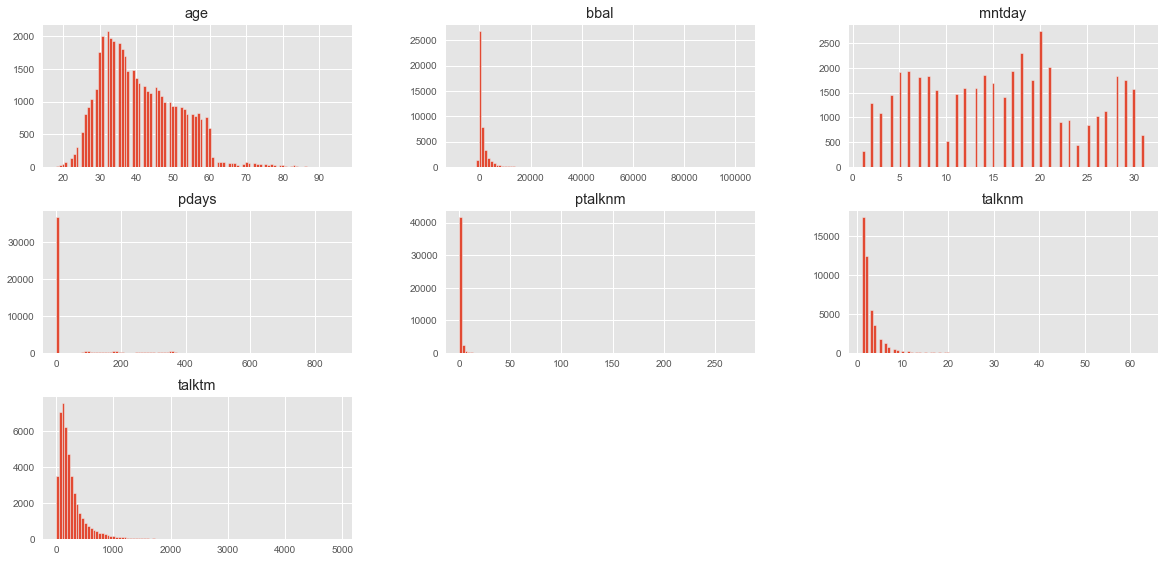

In [999]:
# Histogram of all 7 NonCategorical columns: Visual Distribution of column values:

tdf[numcols].hist(stacked=False, bins=100, figsize=(20,30), layout=(9, 3));

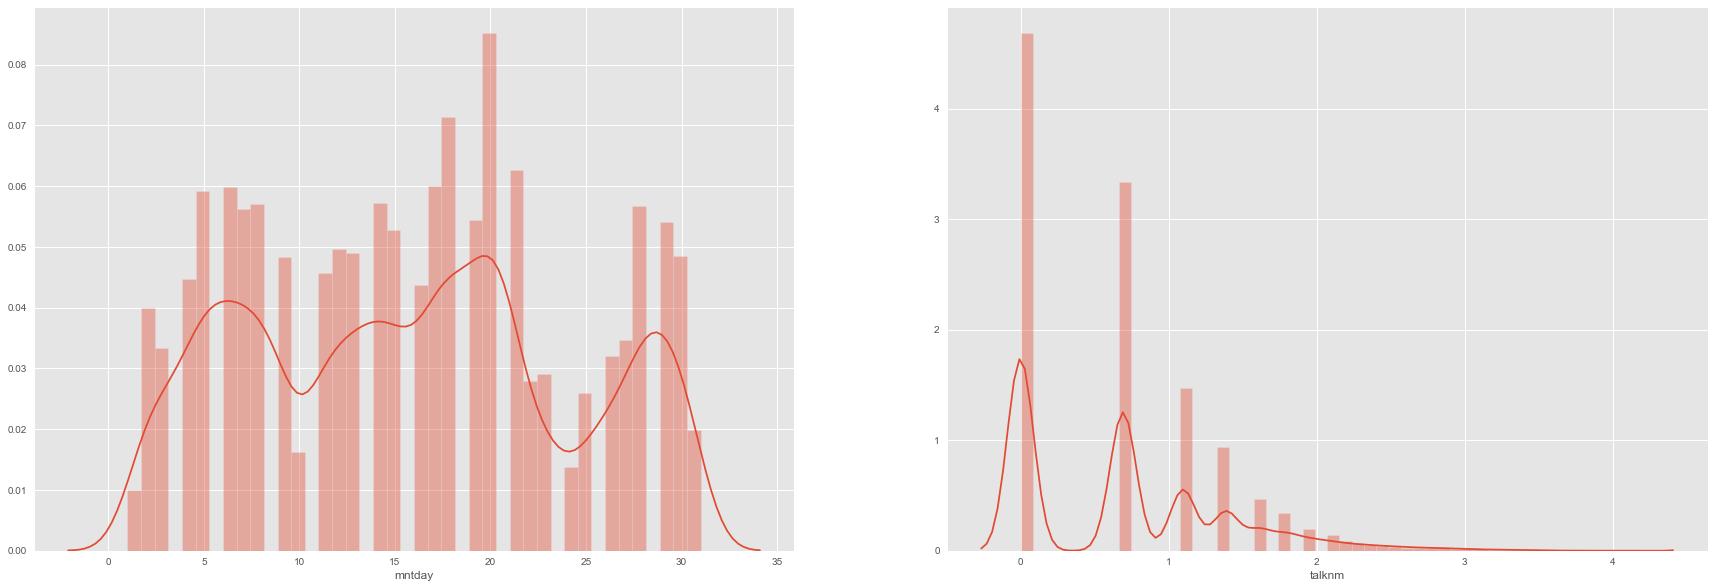

In [1187]:
# A closer look at values for cols 'mntday', 'talknm' with log values of log('talknm')

fig, axs = plt.subplots(ncols = 2, figsize = (30, 10))

sns.distplot(tdf.mntday, hist=True, ax = axs[0])
sns.distplot(np.log(tdf.talknm), ax = axs[1])


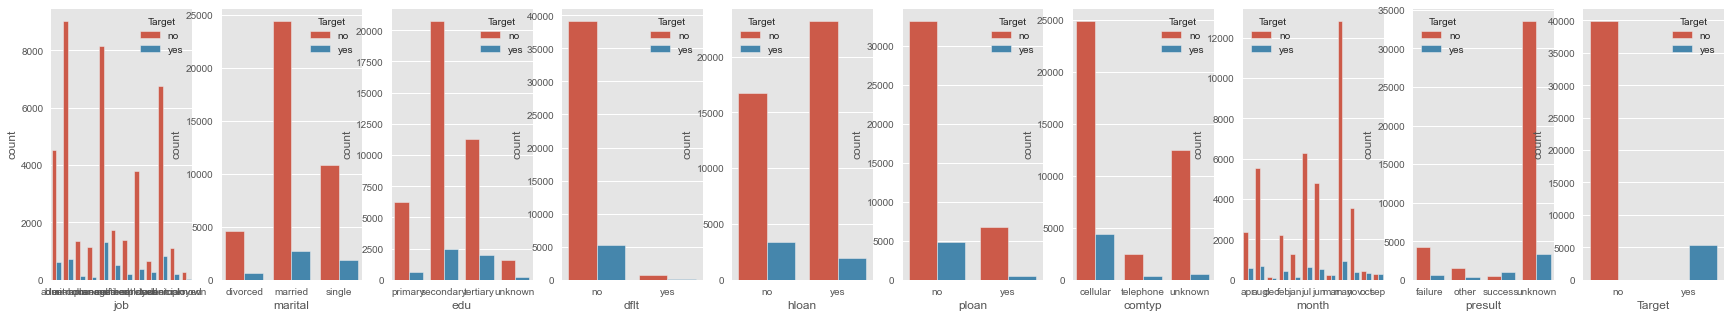

In [1189]:
# Count Plot of all 10 Categorical columns: Visual value_counts of all columns of type 'category'

fig, axs = plt.subplots(ncols = len(catcols), figsize = (30, 5))

j=0
for i in tdf[catcols]:
    sns.countplot(tdf[i], ax = axs[j], hue=tdf.Target)
    j = j+1


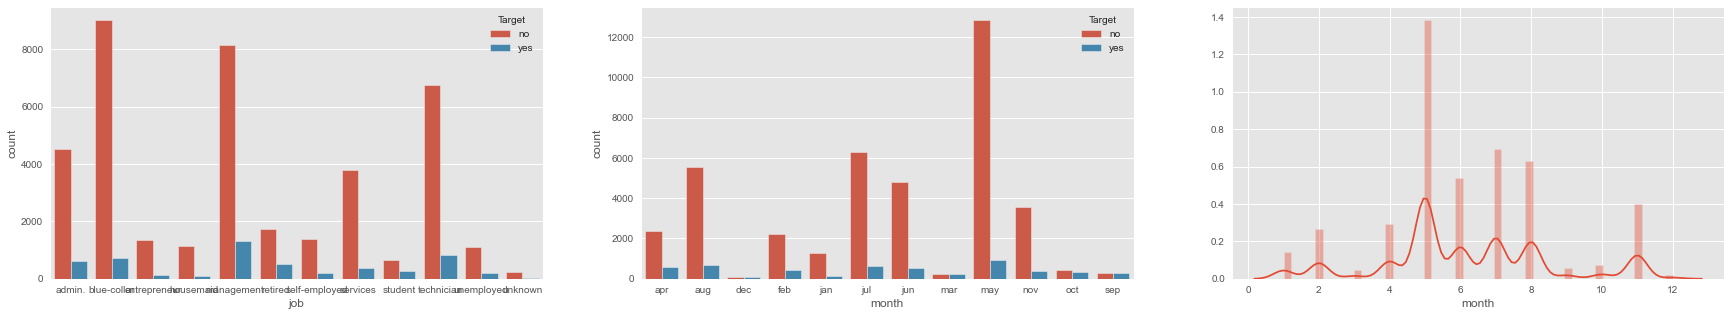

In [1190]:
# A closer look at values for cols 'job', 'month'

fig, axs = plt.subplots(ncols = 3, figsize = (30, 5))

j=0
for i in ['job', 'month']:
#   plt.figure(figsize = (4,2))
    sns.countplot(tdf[i], ax = axs[j], hue=tdf.Target)
    j = j+1

sns.distplot(pd.to_datetime(tdf.month, format='%b').dt.month, hist=True, ax = axs[2])


###### ^^^ D1.1.a Completed & Delivered As Per Above Exhibits: Univariate Analysis: ^^^
* Displayed: Data Types, Names, Description, Meaning, Data Profile, Data Example Rows (Head, Tail, Random Sample)  
* Generated: Date Values Range (Min/Max, Value Counts), Central Calues (Mean, Median, Mode), Standard Deviation, Quartiles  
* Presented: Visual / Graphical Data Distribution for Non Categorical items & Value Counts for Categorical items  
* Identified: Zero & Negative Values, Missing (Null & Unknown/Unspecified) Values, Outliers  
* Identified: Categorical Patern of values for columns 'mntday', 'talknm' via visual aids (plots/graphs)  


##### My Admin Stuff: MSB Notebook Backups:  Backup 1 Mon.Jun.15 3:11pm ^. Backup 2 Tue.Jun.16 12:18am ^. Backup 3 Wed.Jun.17 05:10am^. Backup 4 Wed.Jun.17 08:42am ^. Backup 5 Thu.Jun.18 06:00pm ^

##### D1.1.b vvv Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment: Begin Below: vvv
* Data Pollution / Noise:  
 * Duplicate Row = 0 (None) based on all 17 columns. Status: OK. However: NOTE: There ARE Duplicate rows that are between 60 and 5000+ based on certain Customer "Identifying Information" columns. Details and derivation with code already provided earlier above. Identifying and treating duplicate rows based on Partial Dataset seems OUT OF SCOPE for this project per my guess. Hence will keep such rows untreated.  
 * Duplicate Columns (Very Likely) = 2 Columns: "pdays" and "ptalknm": Status: DROP one of the columns ("pdays"). There are 36,954 (94.6%) Duplicate Rows in these two columns. There are 36,954 -ve values ("-1) in "pdays" and exactly same number (36,954) of Zero values ("0") in "ptalknm" on the same corresponding rows ("one to one" corresponding rows). ASLO: As derived with code earlier above: 94.6% (42,770) of rows in these two columns are duplicated, indicating that these two columns are almost (94.6%) duplicates of each other.  
 * General Data Noise/Pollution: Very Likely Non Contributing Factors (Columns): "pdays", "ptalknm", "presult", "talktm": Status: DROP columns: "pdays", "talktm". PENDING: "ptalknm", "presult" depending BiVariate and further Analysis.  

* Outlier Values:  
 * $Age In Years:$ 'age': Status: OK = Keep: Very Low Outliers, just about 1%  
 * $Bank Balance:$ 'bbal': Status: Bin: Create bins. About 10% Outliers  
 * $Day Of Month:$ 'mntday': Status: OK = Keep: 0% (No Outliers Values). NOTE: But, will Bin them as the plot shows multiple (3 peaks) indicating Categorical nature.  
 * $Contact/Call Time in Seconds (This Campaign):$ 'talktm': Status: OK = Keep: Low Outliers 7%. NOTE: This column will be DROPPED per as the Business (provided at the data source at UIC website: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)  
 * $Number Of Time Contacted/Called (This Campaign):$ 'talknm': Status: Bin: About 7% Outliers. NOTE: Will Bin them as the plot shows multiple (4 or 5 peaks) indicating Categorical nature.  
 * $Days Since Last Contact/Call (Previous Campaign:$ 'pdays': Status: OK = Keep: About 18% Outliers ("-1" values). NOTE: This column will be DROPPED because its a duplicate of column 'ptalknm' (as derived and note above)  
 * $Number Of Time Contacted/Called (Previous Campaign):$ 'ptalknm': Status: OK = Keep: About 18% Outliers (Zero values). NOTE: This column is likely to be DROPPED because its from Previous Cmapaign and it has Very Highly Skewed and it may not significantly contribute to predict the "Target".
 
* Missing, Unknown / Unspecified Values:  
 * Missing Values: Null Values, NaN Values: Status: OK = No Such Values
 * Unknown / Unspecified Values:  
  . $Education:$ 'edu': Status: OK = Keep: "Unknown" = 1,857 values = Will treat it as another Category = "Unknown".  
  . $Communication Type:$ 'comtyp': Status: OK = Keep: "Unknown" = 13,020 values = Will treat it as another Category = "Unknown".  
  . $Prvious Campaign Result:$ 'presult': PENDING = DROP COLUMN?: "Unknown" = 36,959 (81.75%) values (extremely skewed). Also its from previous campaign. Its highly likely that it doesnt contribute significantly towatds Target. After BiVariate Analysis we will determine whether to Drop this column or not.  

* Negative Values:  
 * $Bank Account Balance:$ 'bbal': Status: OK = Keep: No special treatment needed: Per Business (Academic Advisor, in this case) its OK to have -ve balance. Notes: It has about 3.7k negative value which potentially indicates an Overdraft because it doesnt appear to be an amount owed on Credit Card, Loans, etc type accounts.  
 * $Days Since Last Contact (Previous Campaign):$ 'pdays': PENDING = DROP COLUMN?: It has 36,954 -ve vals (-1) of 45,211 total rows ie 81.73% (extremely skewed). "-1" value indicates "No Contact or No Contact in 900+ days. Also its from previous campaign. Its highly likely that it doesnt contribute significantly towatds Target. After BiVariate Analysis we will determine whether to Drop this column or not.

* Zero Values:  
 * $Bank Account Balance:$ 'bbal': Status: OK = Keep: Zero value balance is OK. There are 3,514 rows such rows. No special treatment needed.  
 * $NumberOfTimesContacted/Called (Previous Campaign):$ 'ptalknm': Status PENDING = DROP COLUMN? It has 36,954 ZERO values of 45,211 total rows ie 81.73% (extremely skewed). "0" value indicates "No Contacts performed" during previous Campaign. Also this column data is from the previous campaign. Its highly likely that it doesnt contribute significantly towatds Target. After BiVariate Analysis we will determine whether to Drop this column or not.  

###### D1.1.b ^^^ Completed & Delivered As Per Above Exhibits: Strategies for Data Challenges, Pollution, Outliers, Missing Values, Etc. ^^^

D1.1.c vvv Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots. Begin Below: vvv    

* ### Insight Drawn From the foregoing Plots:  
 * ###### All Non Categorical / Numeric columns:  
 From Distograms/Distribution plots, All of them appear to be extremely skewed, except for 'age', 'mntday' and 'talknm'. 'age' is somewhat skewed. Columns 'mntday' and 'talknm' has a rythemic distribution pattern which shows multiple peaks (mntday = THREE peaks, talknm = FIVE+ peaks) indicating Categorical nature of the data values.  
 * ###### All Categorical columns:  
 From Count Plots, it appears that the All columns values have a high degree of imbalance in the category values, except for 'hloan' (low imbalance). 'edu', 'marital' has medium imbalance. 'Target', 'presult', 'dflt' has extremely impalance.  
  
* ### Steps To Take: Encoding Strategy for Cat. & NonCat. Column Values:  
 * $Age:$ 'age': Bin
 * $Job:$ 'job': One Hot Encode  
 * $Marital Status:$ 'marital': One Hot Encode  
 * $Education:$ 'edu': One Hot Encode  
 * $Default:$ 'dflt': One Hot Encode  
 * $Bank Balance:$ 'bbal': Bin  
 * $Home Loan:$ 'hloan': One Hot Encode  
 * $Personal Loan:$ 'ploan': One Hot Encode  
 * $Communication Type:$ 'comtyp': One Hot Encode  
 * $Day Of Month:$ 'mntday': Bin x 3  
 * $Calendar Month:$ 'month': Bin x 4  
 * $Times Contacted/Called:$ 'talknm': Bin x 9  
 * $Target:$ 'Target': One Hot Encode  

* ### Steps To Take: In a Nut Shell:  
 * DROP Columns: "talktm", "ptalknm", "pdays", "presult"  
 * NO Binning for "age"  
 * Treat the remaining 12 columns as per above mentioned "Encoding Strategy"  

###### D1.1.c ^^^ Completed & Delivered As Per Above Exhibits: Comments, Steps, Insights from the Plots ^^^

##### Deliverable 1.2 Multivariate analysis = 8 Marks

D1.2.a Bi-variate analysis between the *** Predictor variables and Target column ***. Comment
on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

###### D1.2.a vvv Pair Plot and Box Plot: Study with Target and Density Curves (As applicable). Begins below: vvv

### * Pair Plot Study of Predictor varibales and Target column (Hue="Target") with Density Curves (diag_kind="kde")

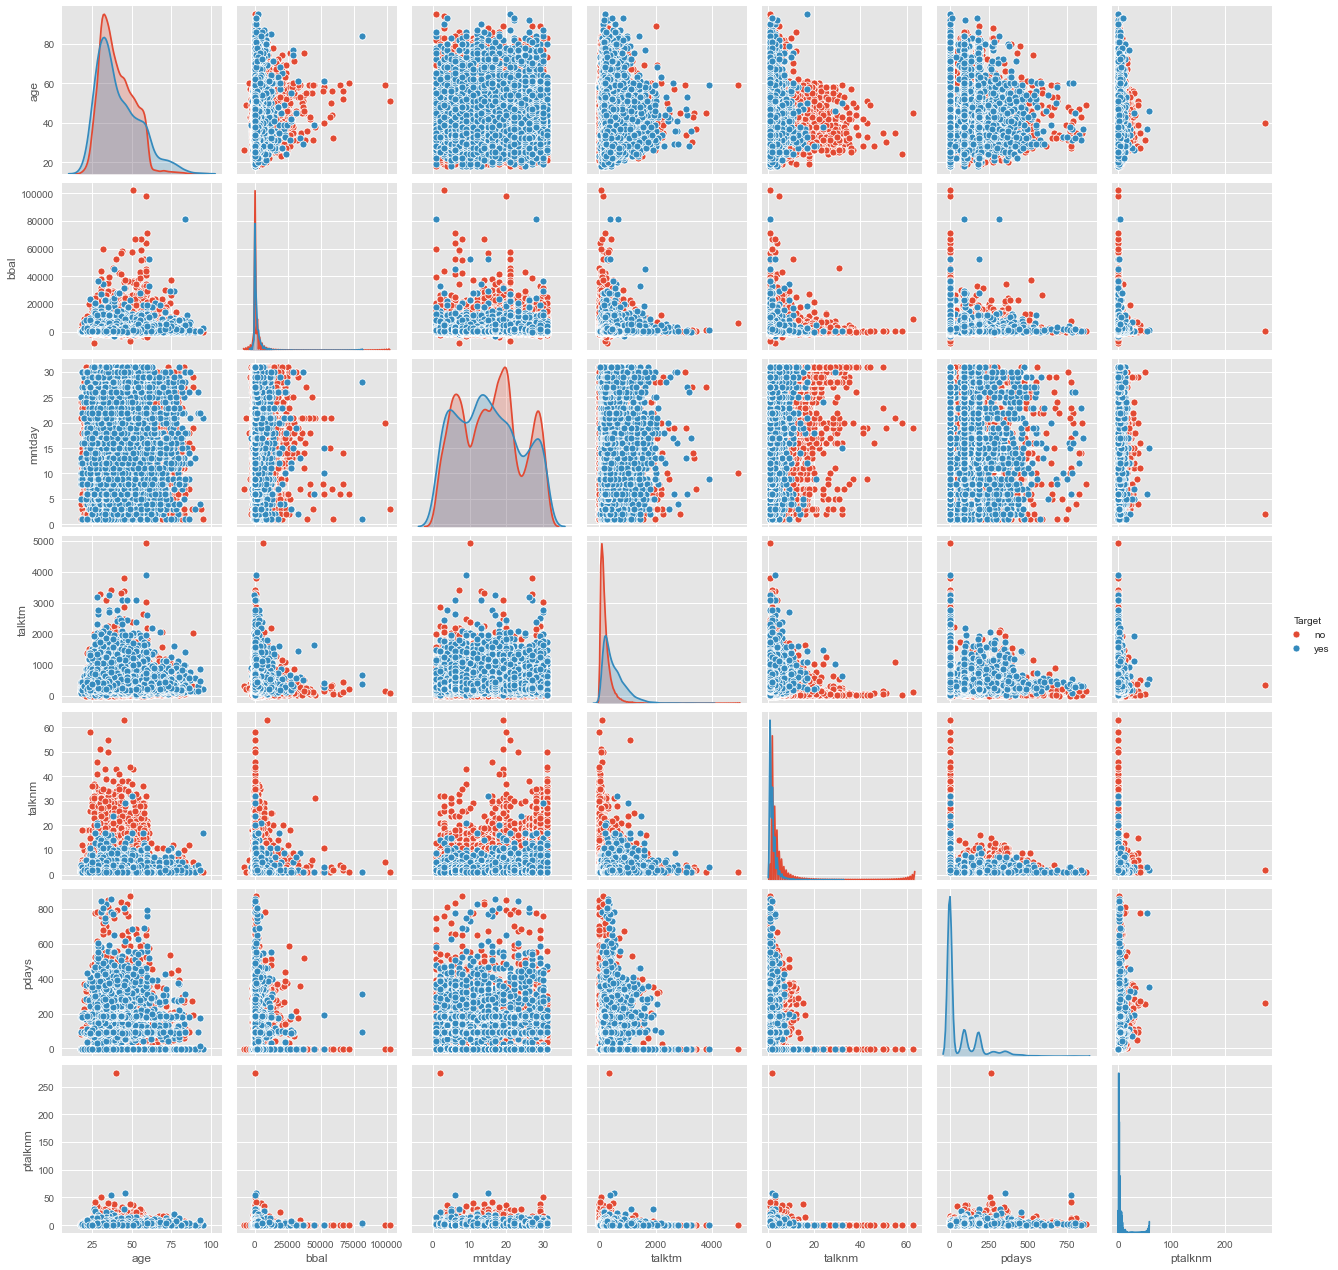

In [1423]:
Markdown('### * Pair Plot Study of Predictor varibales and Target column (Hue="Target") with Density Curves (diag_kind="kde")')
sns.pairplot(tdf, diag_kind='kde', hue='Target')


### * Box Plot Study of Predictor varibales and Target column (Hue="Target")

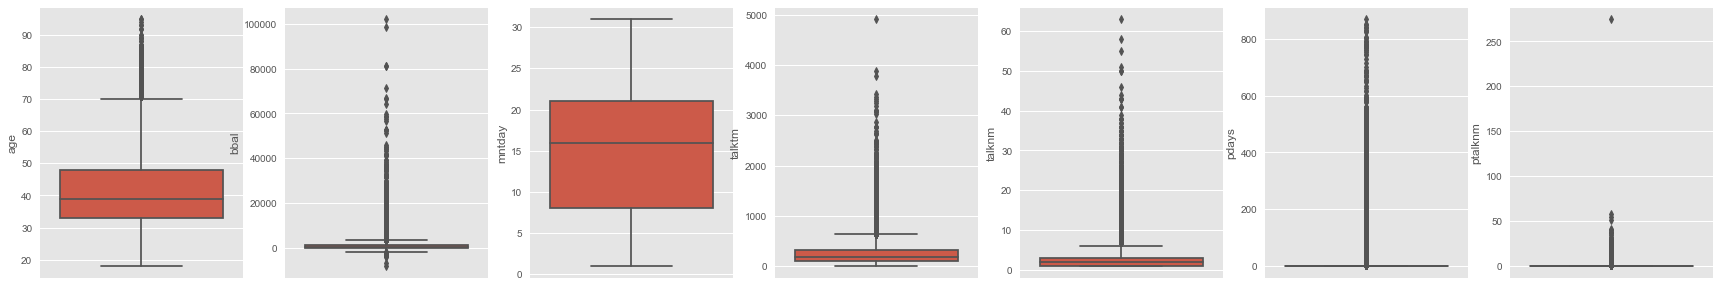

In [1438]:
Markdown('### * Box Plot Study of Predictor varibales and Target column (Hue="Target")')

fig, axs = plt.subplots(ncols = len(numcols), figsize = (30, 5))

j=0
for i in tdf[numcols]:
    sns.boxplot(tdf[i], ax = axs[j], orient='v', hue=tdf.Target)
    j = j+1


###### D1.2.a ^^^ Completed & Delivered As Per Above Exhibits: Pair Plot & Box Plot: Study with Target & Density. ^^^

age  bbal  mntday  talktm  talknm  pdays  ptalknm
age      1.00  0.10   -0.01   -0.00    0.00  -0.02     0.00
bbal     0.10  1.00    0.00    0.02   -0.01   0.00     0.02
mntday  -0.01  0.00    1.00   -0.03    0.16  -0.09    -0.05
talktm  -0.00  0.02   -0.03    1.00   -0.08  -0.00     0.00
talknm   0.00 -0.01    0.16   -0.08    1.00  -0.09    -0.03
pdays   -0.02  0.00   -0.09   -0.00   -0.09   1.00     0.45
ptalknm  0.00  0.02   -0.05    0.00   -0.03   0.45     1.00

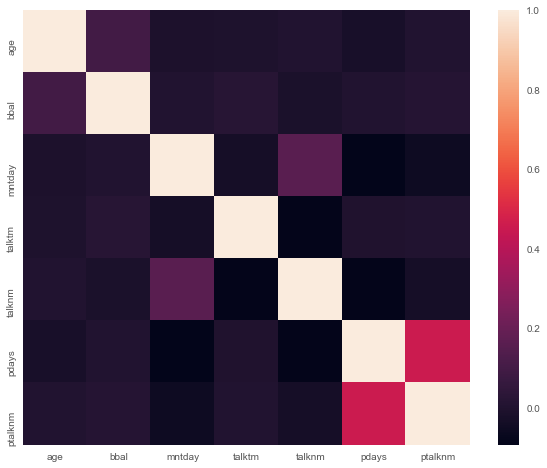

In [1442]:
# Optional Exhibits: 
tdf.corr()
sns.heatmap(tdf.corr())

###### My Admin Stuff: MSB Notebook Backups: Backup 6 Fri.Jun.19 2:48pm ^. 

D1.2.b Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots  
 * 'pdays', 'ptalktm' are HIGHLY Correlated as per the Pair Plot Color Shade and per the Heat Map above.  
 * 'pdays', 'ptalktm' Each of these two cols have extremey LOW Predictor value (predictably) as per the Density curve with respect to the Target in the Pair Plot above.  
 * Box Plots: Except 'mntday' and to some extent 'age', the remaining 5 Non Categorical cols have major Outliers which will be treated below as outlined in Deliverable D1.1.b and D1.1.c
 * NOTES: Some overlapping Conclusions / Comments across Deliverables:  
  * Count Plots with respect to Target were also studies and commented upon in Deliverable D1.1.a (UniVariate Analysis) which meets the requirement here for this Deliverable.  
  * Some of the Comments, Steps, Insights, Etc. stated in Deliverables D1.1.b and D1.1.c can be / maybe used here also, as applicable, due to some overlap nature / features between Deliverables D1.1.b and D1.1.c and D1.2.b  
 
###### D1.2.b ^^^ Completed & Delivered As Per Above Exhibits: Comments, Steps, Insights from BiVariate Plots. ^^^

### Deliverable 2 : Prepare the data for analytics = 10 Marks  
 * D2.1 Ensure the attribute types are correct. If not, take appropriate actions.
 * D2.2 Get the data model ready.
 * D2.3 Transform the data i.e. scale / normalize if required
 * D2.4 Create the training set and test set in ratio of 70:30

###### Deliverable 2 : D2.x: vvv Begins Below: vvv


In [1595]:
tdf.info()
tdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      45211 non-null  int64   
 1   job      45211 non-null  category
 2   marital  45211 non-null  category
 3   edu      45211 non-null  category
 4   dflt     45211 non-null  category
 5   bbal     45211 non-null  int64   
 6   hloan    45211 non-null  category
 7   ploan    45211 non-null  category
 8   comtyp   45211 non-null  category
 9   mntday   45211 non-null  int64   
 10  month    45211 non-null  category
 11  talktm   45211 non-null  int64   
 12  talknm   45211 non-null  int64   
 13  pdays    45211 non-null  int64   
 14  ptalknm  45211 non-null  int64   
 15  presult  45211 non-null  category
 16  Target   45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


age           job  marital        edu dflt  bbal hloan ploan   comtyp  \
0   58    management  married   tertiary   no  2143   yes    no  unknown   
1   44    technician   single  secondary   no    29   yes    no  unknown   
2   33  entrepreneur  married  secondary   no     2   yes   yes  unknown   
3   47   blue-collar  married    unknown   no  1506   yes    no  unknown   
4   33       unknown   single    unknown   no     1    no    no  unknown   

   mntday month  talktm  talknm  pdays  ptalknm  presult Target  
0       5   may     261       1     -1        0  unknown     no  
1       5   may     151       1     -1        0  unknown     no  
2       5   may      76       1     -1        0  unknown     no  
3       5   may      92       1     -1        0  unknown     no  
4       5   may     198       1     -1        0  unknown     no

In [1599]:
# Drop columns as Identified in earlier Deliverable D1.x.x Notes: 'talktm', 'pdays', 'ptalknm', 'presult'
tdf.head()
tdf.info() # Before drop
tdf.drop(columns=['talktm', 'pdays', 'ptalknm', 'presult'], inplace=True)
tdf.head()
tdf.info() # After drop

age           job  marital        edu dflt  bbal hloan ploan   comtyp  \
0   58    management  married   tertiary   no  2143   yes    no  unknown   
1   44    technician   single  secondary   no    29   yes    no  unknown   
2   33  entrepreneur  married  secondary   no     2   yes   yes  unknown   
3   47   blue-collar  married    unknown   no  1506   yes    no  unknown   
4   33       unknown   single    unknown   no     1    no    no  unknown   

   mntday month  talktm  talknm  pdays  ptalknm  presult Target  
0       5   may     261       1     -1        0  unknown     no  
1       5   may     151       1     -1        0  unknown     no  
2       5   may      76       1     -1        0  unknown     no  
3       5   may      92       1     -1        0  unknown     no  
4       5   may     198       1     -1        0  unknown     no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      45211 non-null  int64   
 1   job      45211 non-null  category
 2   marital  45211 non-null  category
 3   edu      45211 non-null  category
 4   dflt     45211 non-null  category
 5   bbal     45211 non-null  int64   
 6   hloan    45211 non-null  category
 7   ploan    45211 non-null  category
 8   comtyp   45211 non-null  category
 9   mntday   45211 non-null  int64   
 10  month    45211 non-null  category
 11  talktm   45211 non-null  int64   
 12  talknm   45211 non-null  int64   
 13  pdays    45211 non-null  int64   
 14  ptalknm  45211 non-null  int64   
 15  presult  45211 non-null  category
 16  Target   45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


age           job  marital        edu dflt  bbal hloan ploan   comtyp  \
0   58    management  married   tertiary   no  2143   yes    no  unknown   
1   44    technician   single  secondary   no    29   yes    no  unknown   
2   33  entrepreneur  married  secondary   no     2   yes   yes  unknown   
3   47   blue-collar  married    unknown   no  1506   yes    no  unknown   
4   33       unknown   single    unknown   no     1    no    no  unknown   

   mntday month  talknm Target  
0       5   may       1     no  
1       5   may       1     no  
2       5   may       1     no  
3       5   may       1     no  
4       5   may       1     no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      45211 non-null  int64   
 1   job      45211 non-null  category
 2   marital  45211 non-null  category
 3   edu      45211 non-null  category
 4   dflt     45211 non-null  category
 5   bbal     45211 non-null  int64   
 6   hloan    45211 non-null  category
 7   ploan    45211 non-null  category
 8   comtyp   45211 non-null  category
 9   mntday   45211 non-null  int64   
 10  month    45211 non-null  category
 11  talknm   45211 non-null  int64   
 12  Target   45211 non-null  category
dtypes: category(9), int64(4)
memory usage: 1.8 MB


In [1600]:
# Incremental DF Backup 3 as of: Fri.Jun.19 04:59pm
tdf3 = tdf.copy()  # Modified Df: Dropped 4 Columns: 'talktm', 'pdays', 'ptalknm', 'presult'

# Verify backup copy
tdf3.shape, type(tdf3)
tdf3.sample(6)
tdf3.info()

((45211, 13), pandas.core.frame.DataFrame)

age          job   marital        edu dflt  bbal hloan ploan  \
18648   44  blue-collar  divorced  secondary   no  3258    no    no   
33252   33   technician    single  secondary   no  4240   yes    no   
34785   26     services    single  secondary   no  -481   yes   yes   
42215   58  blue-collar   married  secondary   no   381    no    no   
43506   38  blue-collar  divorced  secondary   no     0   yes    no   
26367   52   management   married   tertiary   no  6922    no    no   

          comtyp  mntday month  talknm Target  
18648   cellular      31   jul       6     no  
33252   cellular      20   apr       1     no  
34785   cellular       6   may       5     no  
42215   cellular      11   nov       4     no  
43506  telephone      20   apr       1    yes  
26367   cellular      20   nov       1     no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      45211 non-null  int64   
 1   job      45211 non-null  category
 2   marital  45211 non-null  category
 3   edu      45211 non-null  category
 4   dflt     45211 non-null  category
 5   bbal     45211 non-null  int64   
 6   hloan    45211 non-null  category
 7   ploan    45211 non-null  category
 8   comtyp   45211 non-null  category
 9   mntday   45211 non-null  int64   
 10  month    45211 non-null  category
 11  talknm   45211 non-null  int64   
 12  Target   45211 non-null  category
dtypes: category(9), int64(4)
memory usage: 1.8 MB


In [ ]:
# Prepare for Encoding Cat Cols as Discussed & Described in Previous Deliverables D1.x.x above

# Create main current DF "tdf" to a temp DF "xdf"
xdf = tdf.copy()

# Bin column 'age' and add the binned series to xdf as new col 'ageb' (age binned)
ageb = pd.cut(xdf.age, bins=10, labels=False, retbins=True) # Good!
xdf['ageb'] = ageb[0]  # Get the Data Series Good!
ageb[1]  # Display ageb Bins

# Bin column 'bbal' and add the binned series to xdf as new col 'balb' (bbal binned)
balb = pd.cut(xdf.bbal, bins=13, labels=False, retbins=True) # Good!
xdf['balb'] = balb[0]  # Good# Get the Data Series Good!
balb[1]  # Display balb Bins

# Bin column 'mntday' and add the binned series to xdf as new col 'mdayb' (mdayb binned)
mdayb = pd.cut(xdf.mntday, bins=3, labels=False, retbins=True) # Good!
xdf['mdayb'] = mdayb[0]  # Good# Get the Data Series Good!
mdayb[1]  # Display mdayb Bins

# Decode 'month' name text values to month numeric values
xdf.month = pd.to_datetime(xdf.month, format='%b').dt.month

# Bin column 'month' and add the binned series to xdf as new col 'mntb' (mntb binned)
mntb = pd.cut(xdf.month, bins=4, labels=False, retbins=True) # Good!
xdf['mntb'] = mntb[0]  # Get the Data Series Good!
mntb[1]  # Display mntb Bins

# Scale & Bin column 'talknm' and add the scaled & binned series to xdf as new col 'tnmb' (tnmb binned)
# Used "log" to scale the values and then used "round" in two sequences to derive 9 bin (1...9)
xdf['tnmb'] = ((round(round(np.log(xdf.talknm),1)/5,1)*10)+1)  # *** Good ***


In [1733]:
xdf.sample(6)
xdf.info()

age         job   marital        edu dflt  bbal hloan ploan     comtyp  \
43907   24     student    single    unknown   no   358    no    no   cellular   
561     36      admin.  divorced  secondary   no   131   yes    no    unknown   
42816   51  management   married    unknown   no  1708    no    no  telephone   
12500   35      admin.   married  secondary   no   907    no   yes    unknown   
7087    43  management   married   tertiary   no   724   yes    no    unknown   
34225   36      admin.   married   tertiary   no  3221    no    no   cellular   

       mntday  month  talktm  talknm  pdays  ptalknm  presult Target  ageb  \
43907      14      6     245       1    384        1    other    yes     0   
561         6      5     153       1     -1        0  unknown     no     2   
42816      29      1      92       3     -1        0  unknown     no     4   
12500       2      7      97       4     -1        0  unknown     no     2   
7087       29      5     138       1     -1        0  unknown     no     3   
34225       4      5     322      11     -1        0  unknown    yes     2   

       mntb  mdayb  balb  tnmb  
43907     1      1     0  1.00  
561       1      0     0  1.00  
42816     0      2     1  3.00  
12500     2      0     1  4.00  
7087      1      2     1  1.00  
34225     1      0     1  6.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      45211 non-null  int64   
 1   job      45211 non-null  category
 2   marital  45211 non-null  category
 3   edu      45211 non-null  category
 4   dflt     45211 non-null  category
 5   bbal     45211 non-null  int64   
 6   hloan    45211 non-null  category
 7   ploan    45211 non-null  category
 8   comtyp   45211 non-null  category
 9   mntday   45211 non-null  int64   
 10  month    45211 non-null  int64   
 11  talktm   45211 non-null  int64   
 12  talknm   45211 non-null  int64   
 13  pdays    45211 non-null  int64   
 14  ptalknm  45211 non-null  int64   
 15  presult  45211 non-null  category
 16  Target   45211 non-null  category
 17  ageb     45211 non-null  int64   
 18  mntb     45211 non-null  int64   
 19  mdayb    45211 non-null  int64   
 20  balb     45211 non-null  int

In [1747]:
# Attach the newly Generated Binned / Scalled columns from Temp df ("xdf") to Main df ("tdf"): ageb, mntb, mdayb, balb, tnmb

tdf3.sample(6)  # Before
tdf3.info()

# Attach ageb Column: Age: binned in 10 (roughly a decade) slots
tdf['ageb'] = ageb[0]
print('\n* ageb Bins:', ageb[1])

# Attach mntb Column: Month: binned to Year Quarter (roughly 3 months or a 1/4 year per the peaks in the plot)
tdf['mntb'] = mntb[0]
print('\n* mntb Bins:', mntb[1])

# Attach mdayb Column: Month Day: binned to a 1/3 of a month (roughly 10 days per the peaks in the plot)
tdf['mdayb'] = mdayb[0]
print('\n* mdayb Bins:', mdayb[1])

# Attach balb Column: Bank Balance: binned in 13 (optimal) slots per the "pd.cut()" function's internal algorithm
tdf['balb'] = balb[0]
print('\n* balb Bins:', balb[1])

# Attach tnmb Column: Contact/Call/Talk Time (Current Campaign): Scaled with "log()" function then binned in 9 slots
tdf['tnmb'] = xdf['tnmb']
print('\n* tnmb Bins: 9 Bins (1...9)')

tdf.sample(6)
tdf.info()  # After

age           job  marital        edu dflt  bbal hloan ploan  \
20478   30    management   single  secondary   no    24    no    no   
29752   52        admin.  married    primary   no  2281   yes   yes   
15442   30    management  married   tertiary   no  1195    no    no   
45104   73       retired  married    primary   no  1388    no    no   
38509   26  entrepreneur   single   tertiary   no   255   yes    no   
2702    24   blue-collar  married  secondary   no    32    no    no   

          comtyp  mntday month  talknm Target  
20478   cellular      12   aug       4     no  
29752  telephone       4   feb       1     no  
15442   cellular      18   jul       2     no  
45104  telephone      25   oct       1     no  
38509   cellular      15   may       1     no  
2702     unknown      13   may       3     no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      45211 non-null  int64   
 1   job      45211 non-null  category
 2   marital  45211 non-null  category
 3   edu      45211 non-null  category
 4   dflt     45211 non-null  category
 5   bbal     45211 non-null  int64   
 6   hloan    45211 non-null  category
 7   ploan    45211 non-null  category
 8   comtyp   45211 non-null  category
 9   mntday   45211 non-null  int64   
 10  month    45211 non-null  category
 11  talknm   45211 non-null  int64   
 12  Target   45211 non-null  category
dtypes: category(9), int64(4)
memory usage: 1.8 MB

* ageb Bins: [17.923 25.7   33.4   41.1   48.8   56.5   64.2   71.9   79.6   87.3
 95.   ]

* mntb Bins: [ 0.989  3.75   6.5    9.25  12.   ]

* mdayb Bins: [ 0.97 11.   21.   31.  ]

* balb Bins: [ -8129.146         453.76923077   8926.53846154  17399.3

age          job  marital        edu dflt  bbal hloan ploan     comtyp  \
12128   58  blue-collar  married    unknown   no   703    no    no    unknown   
3964    39     services   single  secondary   no  -388   yes    no    unknown   
38070   37     services  married  secondary   no    20   yes    no  telephone   
43113   32   technician   single  secondary   no   324    no   yes   cellular   
40599   44   management  married   tertiary   no  1646   yes    no   cellular   
19943   40   management  married   tertiary   no   326    no    no   cellular   

       mntday month  talknm Target  ageb  mntb  mdayb  balb  tnmb  
12128      20   jun       3     no     5     1      1     1  3.00  
3964       16   may       2     no     2     1      1     0  2.00  
38070      14   may       5     no     2     1      1     0  4.00  
43113      23   feb       1    yes     1     0      2     0  1.00  
40599      29   jul       6     no     3     2      2     1  5.00  
19943       8   aug       2     no     2     2      0     0  2.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      45211 non-null  int64   
 1   job      45211 non-null  category
 2   marital  45211 non-null  category
 3   edu      45211 non-null  category
 4   dflt     45211 non-null  category
 5   bbal     45211 non-null  int64   
 6   hloan    45211 non-null  category
 7   ploan    45211 non-null  category
 8   comtyp   45211 non-null  category
 9   mntday   45211 non-null  int64   
 10  month    45211 non-null  category
 11  talknm   45211 non-null  int64   
 12  Target   45211 non-null  category
 13  ageb     45211 non-null  int64   
 14  mntb     45211 non-null  int64   
 15  mdayb    45211 non-null  int64   
 16  balb     45211 non-null  int64   
 17  tnmb     45211 non-null  float64 
dtypes: category(9), float64(1), int64(8)
memory usage: 3.5 MB


In [1748]:
# Incremental DF Backup 4 as of: Fri.Jun.19 08:15pm
tdf4 = tdf.copy()  # Modified Df: Added 5 Binned Columns: ageb, mntb, mdayb, balb, tnmb

# Verify backup copy
tdf4.shape, type(tdf4)
tdf4.sample(6)
tdf4.info()

((45211, 18), pandas.core.frame.DataFrame)

age          job  marital        edu dflt  bbal hloan ploan    comtyp  \
42233   57   unemployed  married  secondary   no  2299    no    no  cellular   
30331   27   management   single   tertiary   no  2849    no    no  cellular   
16114   35   management   single   tertiary   no   219    no    no  cellular   
7180    23     services   single  secondary   no     0   yes    no   unknown   
38370   38   technician   single  secondary   no   553   yes    no  cellular   
3977    37  blue-collar   single  secondary   no   197   yes    no   unknown   

       mntday month  talknm Target  ageb  mntb  mdayb  balb  tnmb  
42233      12   nov       3     no     5     3      1     1  3.00  
30331       5   feb       1     no     1     0      0     1  1.00  
16114      22   jul       6     no     2     2      2     0  5.00  
7180       29   may       4     no     0     1      2     0  4.00  
38370      15   may       2     no     2     1      1     1  2.00  
3977       16   may       3     no     2     1      1     0  3.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      45211 non-null  int64   
 1   job      45211 non-null  category
 2   marital  45211 non-null  category
 3   edu      45211 non-null  category
 4   dflt     45211 non-null  category
 5   bbal     45211 non-null  int64   
 6   hloan    45211 non-null  category
 7   ploan    45211 non-null  category
 8   comtyp   45211 non-null  category
 9   mntday   45211 non-null  int64   
 10  month    45211 non-null  category
 11  talknm   45211 non-null  int64   
 12  Target   45211 non-null  category
 13  ageb     45211 non-null  int64   
 14  mntb     45211 non-null  int64   
 15  mdayb    45211 non-null  int64   
 16  balb     45211 non-null  int64   
 17  tnmb     45211 non-null  float64 
dtypes: category(9), float64(1), int64(8)
memory usage: 3.5 MB


###### My Admin Stuff: MSB Notebook Backups: Backup 7 Fri.Jun.19 8:21pm ^. 

In [1752]:
# After deriving 5 new binned cols from 5 old raw columns: Drop these Redundant raw cols: (age, bbal, month, mntday, talknm):

tdf.head() # Before drop
tdf.info() 
tdf.drop(columns=['age', 'bbal', 'month', 'mntday', 'talknm'], inplace=True)
tdf.head()
tdf.info() # After drop

age           job  marital        edu dflt  bbal hloan ploan   comtyp  \
0   58    management  married   tertiary   no  2143   yes    no  unknown   
1   44    technician   single  secondary   no    29   yes    no  unknown   
2   33  entrepreneur  married  secondary   no     2   yes   yes  unknown   
3   47   blue-collar  married    unknown   no  1506   yes    no  unknown   
4   33       unknown   single    unknown   no     1    no    no  unknown   

   mntday month  talknm Target  ageb  mntb  mdayb  balb  tnmb  
0       5   may       1     no     5     1      0     1  1.00  
1       5   may       1     no     3     1      0     0  1.00  
2       5   may       1     no     1     1      0     0  1.00  
3       5   may       1     no     3     1      0     1  1.00  
4       5   may       1     no     1     1      0     0  1.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      45211 non-null  int64   
 1   job      45211 non-null  category
 2   marital  45211 non-null  category
 3   edu      45211 non-null  category
 4   dflt     45211 non-null  category
 5   bbal     45211 non-null  int64   
 6   hloan    45211 non-null  category
 7   ploan    45211 non-null  category
 8   comtyp   45211 non-null  category
 9   mntday   45211 non-null  int64   
 10  month    45211 non-null  category
 11  talknm   45211 non-null  int64   
 12  Target   45211 non-null  category
 13  ageb     45211 non-null  int64   
 14  mntb     45211 non-null  int64   
 15  mdayb    45211 non-null  int64   
 16  balb     45211 non-null  int64   
 17  tnmb     45211 non-null  float64 
dtypes: category(9), float64(1), int64(8)
memory usage: 3.5 MB


job  marital        edu dflt hloan ploan   comtyp Target  ageb  \
0    management  married   tertiary   no   yes    no  unknown     no     5   
1    technician   single  secondary   no   yes    no  unknown     no     3   
2  entrepreneur  married  secondary   no   yes   yes  unknown     no     1   
3   blue-collar  married    unknown   no   yes    no  unknown     no     3   
4       unknown   single    unknown   no    no    no  unknown     no     1   

   mntb  mdayb  balb  tnmb  
0     1      0     1  1.00  
1     1      0     0  1.00  
2     1      0     0  1.00  
3     1      0     1  1.00  
4     1      0     0  1.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   job      45211 non-null  category
 1   marital  45211 non-null  category
 2   edu      45211 non-null  category
 3   dflt     45211 non-null  category
 4   hloan    45211 non-null  category
 5   ploan    45211 non-null  category
 6   comtyp   45211 non-null  category
 7   Target   45211 non-null  category
 8   ageb     45211 non-null  int64   
 9   mntb     45211 non-null  int64   
 10  mdayb    45211 non-null  int64   
 11  balb     45211 non-null  int64   
 12  tnmb     45211 non-null  float64 
dtypes: category(8), float64(1), int64(4)
memory usage: 2.1 MB


###### Identify & Recognize Correct Category Columns Type: "Nominal" and "Ordinal":
 * Nominal Cat. Cols of type: "category" (non Numeric): job, marital, edu, dflt, hloan, ploan, comtyp, Target
 * Ordinal Cat. Cols of type: "number" (numeric): ageb, mntb, mdayb, balb, tnmb
 
 * Column Data Type are Correct and OK to Proceed further processing!



In [1754]:
# Incremental DF Backup 5 as of: Fri.Jun.19 09:03pm

tdf5 = tdf.copy()  # Modified Df: Drop Redundant raw / old cols: (age, bbal, month, mntday, talknm) after new Binned cols

# Verify backup copy
tdf5.shape, type(tdf5)
tdf5.sample(6)
tdf5.info()

((45211, 13), pandas.core.frame.DataFrame)

job  marital        edu dflt hloan ploan    comtyp Target  \
21744   technician  married  secondary   no    no    no  cellular     no   
10753   management  married    primary   no    no    no   unknown     no   
2811   blue-collar   single  secondary   no   yes    no   unknown     no   
42788   technician  married  secondary   no   yes    no  cellular     no   
16842   unemployed   single   tertiary   no   yes    no  cellular    yes   
31776      student   single   tertiary   no    no    no  cellular     no   

       ageb  mntb  mdayb  balb  tnmb  
21744     1     2      1     0  3.00  
10753     5     1      1     1  3.00  
2811      3     1      1     1  2.00  
42788     5     0      2     1  3.00  
16842     1     2      2     1  5.00  
31776     1     1      0     1  2.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   job      45211 non-null  category
 1   marital  45211 non-null  category
 2   edu      45211 non-null  category
 3   dflt     45211 non-null  category
 4   hloan    45211 non-null  category
 5   ploan    45211 non-null  category
 6   comtyp   45211 non-null  category
 7   Target   45211 non-null  category
 8   ageb     45211 non-null  int64   
 9   mntb     45211 non-null  int64   
 10  mdayb    45211 non-null  int64   
 11  balb     45211 non-null  int64   
 12  tnmb     45211 non-null  float64 
dtypes: category(8), float64(1), int64(4)
memory usage: 2.1 MB


In [1768]:
# One Hot Code all 8 Category Columns:
# Create dummies

hotcols = tdf.select_dtypes(include='category').columns

tdf.head()  # Before
tdf.info()

tdf = pd.get_dummies(tdf, columns=hotcols, drop_first=True) 

tdf.head()
tdf.info()  # After


job  marital        edu dflt hloan ploan   comtyp Target  ageb  \
0    management  married   tertiary   no   yes    no  unknown     no     5   
1    technician   single  secondary   no   yes    no  unknown     no     3   
2  entrepreneur  married  secondary   no   yes   yes  unknown     no     1   
3   blue-collar  married    unknown   no   yes    no  unknown     no     3   
4       unknown   single    unknown   no    no    no  unknown     no     1   

   mntb  mdayb  balb  tnmb  
0     1      0     1  1.00  
1     1      0     0  1.00  
2     1      0     0  1.00  
3     1      0     1  1.00  
4     1      0     0  1.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   job      45211 non-null  category
 1   marital  45211 non-null  category
 2   edu      45211 non-null  category
 3   dflt     45211 non-null  category
 4   hloan    45211 non-null  category
 5   ploan    45211 non-null  category
 6   comtyp   45211 non-null  category
 7   Target   45211 non-null  category
 8   ageb     45211 non-null  int64   
 9   mntb     45211 non-null  int64   
 10  mdayb    45211 non-null  int64   
 11  balb     45211 non-null  int64   
 12  tnmb     45211 non-null  float64 
dtypes: category(8), float64(1), int64(4)
memory usage: 2.1 MB


ageb  mntb  mdayb  balb  tnmb  job_blue-collar  job_entrepreneur  \
0     5     1      0     1  1.00                0                 0   
1     3     1      0     0  1.00                0                 0   
2     1     1      0     0  1.00                0                 1   
3     3     1      0     1  1.00                1                 0   
4     1     1      0     0  1.00                0                 0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0              0               1            0                  0   
1              0               0            0                  0   
2              0               0            0                  0   
3              0               0            0                  0   
4              0               0            0                  0   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0             0            0               0               0            0   
1             0            0               1               0            0   
2             0            0               0               0            0   
3             0            0               0               0            0   
4             0            0               0               0            1   

   marital_married  marital_single  edu_secondary  edu_tertiary  edu_unknown  \
0                1               0              0             1            0   
1                0               1              1             0            0   
2                1               0              1             0            0   
3                1               0              0             0            1   
4                0               1              0             0            1   

   dflt_yes  hloan_yes  ploan_yes  comtyp_telephone  comtyp_unknown  \
0         0          1          0                 0               1   
1         0          1          0                 0               1   
2         0          1          1                 0               1   
3         0          1          0                 0               1   
4         0          0          0                 0               1   

   Target_yes  
0           0  
1           0  
2           0  
3           0  
4           0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ageb               45211 non-null  int64  
 1   mntb               45211 non-null  int64  
 2   mdayb              45211 non-null  int64  
 3   balb               45211 non-null  int64  
 4   tnmb               45211 non-null  float64
 5   job_blue-collar    45211 non-null  uint8  
 6   job_entrepreneur   45211 non-null  uint8  
 7   job_housemaid      45211 non-null  uint8  
 8   job_management     45211 non-null  uint8  
 9   job_retired        45211 non-null  uint8  
 10  job_self-employed  45211 non-null  uint8  
 11  job_services       45211 non-null  uint8  
 12  job_student        45211 non-null  uint8  
 13  job_technician     45211 non-null  uint8  
 14  job_unemployed     45211 non-null  uint8  
 15  job_unknown        45211 non-null  uint8  
 16  marital_married    452

In [1769]:
# Incremental DF Backup 6 as of: Fri.Jun.19 09:33pm

tdf6 = tdf.copy()  # Modified Df: After One Hot Encode: Added 14 New cols

# Verify backup copy
tdf6.shape, type(tdf6)
tdf6.sample(6)
tdf6.info()

((45211, 27), pandas.core.frame.DataFrame)

ageb  mntb  mdayb  balb  tnmb  job_blue-collar  job_entrepreneur  \
15638     2     2      1     0  1.00                0                 0   
40577     2     2      1     0  5.00                0                 0   
970       2     1      0     0  1.00                0                 0   
34448     1     1      0     0  1.00                0                 0   
30957     3     0      0     1  4.00                1                 0   
13469     1     2      0     1  1.00                0                 0   

       job_housemaid  job_management  job_retired  job_self-employed  \
15638              0               0            0                  0   
40577              1               0            0                  0   
970                0               1            0                  0   
34448              0               1            0                  0   
30957              0               0            0                  0   
13469              0               1            0                  0   

       job_services  job_student  job_technician  job_unemployed  job_unknown  \
15638             0            0               1               0            0   
40577             0            0               0               0            0   
970               0            0               0               0            0   
34448             0            0               0               0            0   
30957             0            0               0               0            0   
13469             0            0               0               0            0   

       marital_married  marital_single  edu_secondary  edu_tertiary  \
15638                0               0              1             0   
40577                1               0              1             0   
970                  0               0              1             0   
34448                0               1              0             1   
30957                1               0              0             0   
13469                0               1              0             0   

       edu_unknown  dflt_yes  hloan_yes  ploan_yes  comtyp_telephone  \
15638            0         0          1          0                 0   
40577            0         0          0          0                 1   
970              0         0          1          0                 0   
34448            0         0          1          1                 0   
30957            0         0          1          0                 0   
13469            1         0          0          1                 0   

       comtyp_unknown  Target_yes  
15638               0           0  
40577               0           0  
970                 1           0  
34448               0           0  
30957               0           0  
13469               0           0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ageb               45211 non-null  int64  
 1   mntb               45211 non-null  int64  
 2   mdayb              45211 non-null  int64  
 3   balb               45211 non-null  int64  
 4   tnmb               45211 non-null  float64
 5   job_blue-collar    45211 non-null  uint8  
 6   job_entrepreneur   45211 non-null  uint8  
 7   job_housemaid      45211 non-null  uint8  
 8   job_management     45211 non-null  uint8  
 9   job_retired        45211 non-null  uint8  
 10  job_self-employed  45211 non-null  uint8  
 11  job_services       45211 non-null  uint8  
 12  job_student        45211 non-null  uint8  
 13  job_technician     45211 non-null  uint8  
 14  job_unemployed     45211 non-null  uint8  
 15  job_unknown        45211 non-null  uint8  
 16  marital_married    452

###### My Admin Stuff: MSB Notebook Backups: Backup 8 Fri.Jun.19 9:35pm ^. 

In [1776]:
# Rename col names for Convenience:

# cols = tdf.columns
cols
tdf
tdf.rename(columns={'job_blue-collar': 'jblue',
       'job_entrepreneur': 'jentr', 'job_housemaid': 'jmaid', 'job_management': 'jmgmt', 'job_retired': 'jrtrd',
       'job_self-employed': 'jself', 'job_services': 'jsvcs', 'job_student': 'jstdnt', 'job_technician': 'jtchn',
       'job_unemployed': 'jnemp', 'job_unknown': 'jnknwn', 'marital_married': 'mmrd', 'marital_single': 'msngl',
       'edu_secondary': 'esec', 'edu_tertiary': 'etrt', 'edu_unknown': 'enknwn', 'dflt_yes': 'dflt', 'hloan_yes': 'hloan',
       'ploan_yes': 'ploan', 'comtyp_telephone': 'cphone', 'comtyp_unknown': 'cnknwn', 'Target_yes': 'Trgt'}, inplace=True, errors='raise')
cols
tdf


Index(['ageb', 'mntb', 'mdayb', 'balb', 'tnmb', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'edu_secondary', 'edu_tertiary', 'edu_unknown', 'dflt_yes', 'hloan_yes',
       'ploan_yes', 'comtyp_telephone', 'comtyp_unknown', 'Target_yes'],
      dtype='object')

ageb  mntb  mdayb  balb  tnmb  job_blue-collar  job_entrepreneur  \
0         5     1      0     1  1.00                0                 0   
1         3     1      0     0  1.00                0                 0   
2         1     1      0     0  1.00                0                 1   
3         3     1      0     1  1.00                1                 0   
4         1     1      0     0  1.00                0                 0   
...     ...   ...    ...   ...   ...              ...               ...   
45206     4     3      1     1  3.00                0                 0   
45207     6     3      1     1  2.00                0                 0   
45208     7     3      1     1  4.00                0                 0   
45209     5     3      1     1  4.00                1                 0   
45210     2     3      1     1  2.00                0                 1   

       job_housemaid  job_management  job_retired  job_self-employed  \
0                  0               1            0                  0   
1                  0               0            0                  0   
2                  0               0            0                  0   
3                  0               0            0                  0   
4                  0               0            0                  0   
...              ...             ...          ...                ...   
45206              0               0            0                  0   
45207              0               0            1                  0   
45208              0               0            1                  0   
45209              0               0            0                  0   
45210              0               0            0                  0   

       job_services  job_student  job_technician  job_unemployed  job_unknown  \
0                 0            0               0               0            0   
1                 0            0               1               0            0   
2                 0            0               0               0            0   
3                 0            0               0               0            0   
4                 0            0               0               0            1   
...             ...          ...             ...             ...          ...   
45206             0            0               1               0            0   
45207             0            0               0               0            0   
45208             0            0               0               0            0   
45209             0            0               0               0            0   
45210             0            0               0               0            0   

       marital_married  marital_single  edu_secondary  edu_tertiary  \
0                    1               0              0             1   
1                    0               1              1             0   
2                    1               0              1             0   
3                    1               0              0             0   
4                    0               1              0             0   
...                ...             ...            ...           ...   
45206                1               0              0             1   
45207                0               0              0             0   
45208                1               0              1             0   
45209                1               0              1             0   
45210                1               0              1             0   

       edu_unknown  dflt_yes  hloan_yes  ploan_yes  comtyp_telephone  \
0                0         0          1          0                 0   
1                0         0          1          0                 0   
2                0         0          1          1                 0   
3                1         0          1          0                 0   
4                1         0          0          0     

Index(['ageb', 'mntb', 'mdayb', 'balb', 'tnmb', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'edu_secondary', 'edu_tertiary', 'edu_unknown', 'dflt_yes', 'hloan_yes',
       'ploan_yes', 'comtyp_telephone', 'comtyp_unknown', 'Target_yes'],
      dtype='object')

ageb  mntb  mdayb  balb  tnmb  jblue  jentr  jmaid  jmgmt  jrtrd  \
0         5     1      0     1  1.00      0      0      0      1      0   
1         3     1      0     0  1.00      0      0      0      0      0   
2         1     1      0     0  1.00      0      1      0      0      0   
3         3     1      0     1  1.00      1      0      0      0      0   
4         1     1      0     0  1.00      0      0      0      0      0   
...     ...   ...    ...   ...   ...    ...    ...    ...    ...    ...   
45206     4     3      1     1  3.00      0      0      0      0      0   
45207     6     3      1     1  2.00      0      0      0      0      1   
45208     7     3      1     1  4.00      0      0      0      0      1   
45209     5     3      1     1  4.00      1      0      0      0      0   
45210     2     3      1     1  2.00      0      1      0      0      0   

       jself  jsvcs  jstdnt  jtchn  jnemp  jnknwn  mmrd  msngl  esec  etrt  \
0          0      0       0      0      0       0     1      0     0     1   
1          0      0       0      1      0       0     0      1     1     0   
2          0      0       0      0      0       0     1      0     1     0   
3          0      0       0      0      0       0     1      0     0     0   
4          0      0       0      0      0       1     0      1     0     0   
...      ...    ...     ...    ...    ...     ...   ...    ...   ...   ...   
45206      0      0       0      1      0       0     1      0     0     1   
45207      0      0       0      0      0       0     0      0     0     0   
45208      0      0       0      0      0       0     1      0     1     0   
45209      0      0       0      0      0       0     1      0     1     0   
45210      0      0       0      0      0       0     1      0     1     0   

       enknwn  dflt  hloan  ploan  cphone  cnknwn  Trgt  
0           0     0      1      0       0       1     0  
1           0     0      1      0       0       1     0  
2           0     0      1      1       0       1     0  
3           1     0      1      0       0       1     0  
4           1     0      0      0       0       1     0  
...       ...   ...    ...    ...     ...     ...   ...  
45206       0     0      0      0       0       0     1  
45207       0     0      0      0       0       0     1  
45208       0     0      0      0       0       0     1  
45209       0     0      0      0       1       0     0  
45210       0     0      0      0       0       0     0  

[45211 rows x 27 columns]

In [1778]:
tdf
tdf.info()

ageb  mntb  mdayb  balb  tnmb  jblue  jentr  jmaid  jmgmt  jrtrd  \
0         5     1      0     1  1.00      0      0      0      1      0   
1         3     1      0     0  1.00      0      0      0      0      0   
2         1     1      0     0  1.00      0      1      0      0      0   
3         3     1      0     1  1.00      1      0      0      0      0   
4         1     1      0     0  1.00      0      0      0      0      0   
...     ...   ...    ...   ...   ...    ...    ...    ...    ...    ...   
45206     4     3      1     1  3.00      0      0      0      0      0   
45207     6     3      1     1  2.00      0      0      0      0      1   
45208     7     3      1     1  4.00      0      0      0      0      1   
45209     5     3      1     1  4.00      1      0      0      0      0   
45210     2     3      1     1  2.00      0      1      0      0      0   

       jself  jsvcs  jstdnt  jtchn  jnemp  jnknwn  mmrd  msngl  esec  etrt  \
0          0      0       0      0      0       0     1      0     0     1   
1          0      0       0      1      0       0     0      1     1     0   
2          0      0       0      0      0       0     1      0     1     0   
3          0      0       0      0      0       0     1      0     0     0   
4          0      0       0      0      0       1     0      1     0     0   
...      ...    ...     ...    ...    ...     ...   ...    ...   ...   ...   
45206      0      0       0      1      0       0     1      0     0     1   
45207      0      0       0      0      0       0     0      0     0     0   
45208      0      0       0      0      0       0     1      0     1     0   
45209      0      0       0      0      0       0     1      0     1     0   
45210      0      0       0      0      0       0     1      0     1     0   

       enknwn  dflt  hloan  ploan  cphone  cnknwn  Trgt  
0           0     0      1      0       0       1     0  
1           0     0      1      0       0       1     0  
2           0     0      1      1       0       1     0  
3           1     0      1      0       0       1     0  
4           1     0      0      0       0       1     0  
...       ...   ...    ...    ...     ...     ...   ...  
45206       0     0      0      0       0       0     1  
45207       0     0      0      0       0       0     1  
45208       0     0      0      0       0       0     1  
45209       0     0      0      0       1       0     0  
45210       0     0      0      0       0       0     0  

[45211 rows x 27 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ageb    45211 non-null  int64  
 1   mntb    45211 non-null  int64  
 2   mdayb   45211 non-null  int64  
 3   balb    45211 non-null  int64  
 4   tnmb    45211 non-null  float64
 5   jblue   45211 non-null  uint8  
 6   jentr   45211 non-null  uint8  
 7   jmaid   45211 non-null  uint8  
 8   jmgmt   45211 non-null  uint8  
 9   jrtrd   45211 non-null  uint8  
 10  jself   45211 non-null  uint8  
 11  jsvcs   45211 non-null  uint8  
 12  jstdnt  45211 non-null  uint8  
 13  jtchn   45211 non-null  uint8  
 14  jnemp   45211 non-null  uint8  
 15  jnknwn  45211 non-null  uint8  
 16  mmrd    45211 non-null  uint8  
 17  msngl   45211 non-null  uint8  
 18  esec    45211 non-null  uint8  
 19  etrt    45211 non-null  uint8  
 20  enknwn  45211 non-null  uint8  
 21  dflt    45211 non-null  uint8  
 22

In [1779]:
# Incremental DF Backup 7 as of: Fri.Jun.19 10:44pm

tdf7 = tdf.copy()  # Modified Df: After renaming long cols name to shorten for convenience

tdf.to_csv('AIML_Project3_tdf_7_MSB.csv')  # Also export as to .csv to disk

# Verify backup copy
tdf7.shape, type(tdf7)
tdf7.sample(6)
tdf7.info()

((45211, 27), pandas.core.frame.DataFrame)

ageb  mntb  mdayb  balb  tnmb  jblue  jentr  jmaid  jmgmt  jrtrd  \
12019     5     1      1     1  3.00      1      0      0      0      0   
11069     3     1      1     1  3.00      0      0      0      1      0   
44214     2     2      1     0  2.00      0      0      0      1      0   
7029      2     1      2     0  2.00      1      0      0      0      0   
9909      4     1      0     0  1.00      0      0      0      0      0   
34077     2     1      2     0  1.00      0      0      0      1      0   

       jself  jsvcs  jstdnt  jtchn  jnemp  jnknwn  mmrd  msngl  esec  etrt  \
12019      0      0       0      0      0       0     1      0     0     0   
11069      0      0       0      0      0       0     1      0     0     1   
44214      0      0       0      0      0       0     1      0     0     1   
7029       0      0       0      0      0       0     1      0     1     0   
9909       0      0       0      0      1       0     1      0     1     0   
34077      0      0       0      0      0       0     0      0     1     0   

       enknwn  dflt  hloan  ploan  cphone  cnknwn  Trgt  
12019       0     0      0      0       0       1     0  
11069       0     0      1      0       0       1     0  
44214       0     0      0      0       0       0     1  
7029        0     0      1      0       0       1     0  
9909        0     0      0      0       0       1     0  
34077       0     0      1      0       0       0     1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ageb    45211 non-null  int64  
 1   mntb    45211 non-null  int64  
 2   mdayb   45211 non-null  int64  
 3   balb    45211 non-null  int64  
 4   tnmb    45211 non-null  float64
 5   jblue   45211 non-null  uint8  
 6   jentr   45211 non-null  uint8  
 7   jmaid   45211 non-null  uint8  
 8   jmgmt   45211 non-null  uint8  
 9   jrtrd   45211 non-null  uint8  
 10  jself   45211 non-null  uint8  
 11  jsvcs   45211 non-null  uint8  
 12  jstdnt  45211 non-null  uint8  
 13  jtchn   45211 non-null  uint8  
 14  jnemp   45211 non-null  uint8  
 15  jnknwn  45211 non-null  uint8  
 16  mmrd    45211 non-null  uint8  
 17  msngl   45211 non-null  uint8  
 18  esec    45211 non-null  uint8  
 19  etrt    45211 non-null  uint8  
 20  enknwn  45211 non-null  uint8  
 21  dflt    45211 non-null  uint8  
 22

In [1780]:
# Create the training set and test set in ratio of 70:30

# Define X and Y variables:
X = tdf.drop('Trgt',axis=1) # Predictor feature columns
Y = tdf['Trgt'] # Predicted class (1 = True, 0 = False)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=3)


In [1784]:
X_train
X_test
y_train
y_test

ageb  mntb  mdayb  balb  tnmb  jblue  jentr  jmaid  jmgmt  jrtrd  \
24103     5     3      2     0  1.00      0      0      0      1      0   
34104     1     1      2     1  1.00      0      0      0      0      0   
14387     5     2      1     1  3.00      0      0      0      0      0   
13641     4     2      0     0  3.00      0      0      0      1      0   
37104     4     1      1     1  4.00      0      0      0      1      0   
...     ...   ...    ...   ...   ...    ...    ...    ...    ...    ...   
39168     1     1      1     1  2.00      1      0      0      0      0   
25544     2     3      1     0  1.00      0      0      0      0      0   
11513     3     1      1     2  2.00      0      0      0      1      0   
1688      1     1      0     0  1.00      0      0      0      0      0   
5994      3     1      2     0  2.00      0      0      0      0      0   

       jself  jsvcs  jstdnt  jtchn  jnemp  jnknwn  mmrd  msngl  esec  etrt  \
24103      0      0       0      0      0       0     0      0     0     1   
34104      0      0       1      0      0       0     0      1     0     0   
14387      0      0       0      0      0       0     1      0     1     0   
13641      0      0       0      0      0       0     1      0     0     0   
37104      0      0       0      0      0       0     0      0     0     1   
...      ...    ...     ...    ...    ...     ...   ...    ...   ...   ...   
39168      0      0       0      0      0       0     1      0     1     0   
25544      1      0       0      0      0       0     1      0     1     0   
11513      0      0       0      0      0       0     1      0     0     1   
1688       0      0       0      0      0       0     1      0     1     0   
5994       0      0       0      1      0       0     0      0     1     0   

       enknwn  dflt  hloan  ploan  cphone  cnknwn  
24103       0     0      0      1       0       1  
34104       1     0      0      0       0       0  
14387       0     0      0      0       0       0  
13641       0     0      0      0       0       0  
37104       0     0      1      1       1       0  
...       ...   ...    ...    ...     ...     ...  
39168       0     0      1      0       0       0  
25544       0     0      1      0       0       0  
11513       0     0      0      0       0       1  
1688        0     0      1      0       0       1  
5994        0     0      1      0       0       1  

[31647 rows x 26 columns]

ageb  mntb  mdayb  balb  tnmb  jblue  jentr  jmaid  jmgmt  jrtrd  \
11465     2     1      1     1  6.00      0      0      0      1      0   
30430     1     0      0     1  1.00      1      0      0      0      0   
19738     1     2      0     0  3.00      0      0      0      1      0   
13353     3     2      0     1  1.00      0      0      0      1      0   
18408     3     2      2     0  4.00      0      0      0      0      0   
...     ...   ...    ...   ...   ...    ...    ...    ...    ...    ...   
30238     1     0      0     1  4.00      0      0      0      1      0   
6863      2     1      2     1  1.00      1      0      0      0      0   
4109      4     1      1     0  1.00      0      0      0      0      0   
19582     4     2      0     0  4.00      0      0      0      0      0   
32922     1     1      1     1  4.00      0      0      0      0      0   

       jself  jsvcs  jstdnt  jtchn  jnemp  jnknwn  mmrd  msngl  esec  etrt  \
11465      0      0       0      0      0       0     0      1     0     1   
30430      0      0       0      0      0       0     0      1     1     0   
19738      0      0       0      0      0       0     1      0     0     1   
13353      0      0       0      0      0       0     1      0     0     1   
18408      0      1       0      0      0       0     0      0     1     0   
...      ...    ...     ...    ...    ...     ...   ...    ...   ...   ...   
30238      0      0       0      0      0       0     1      0     0     1   
6863       0      0       0      0      0       0     1      0     0     0   
4109       0      1       0      0      0       0     1      0     1     0   
19582      0      0       0      1      0       0     1      0     1     0   
32922      0      0       0      1      0       0     0      1     1     0   

       enknwn  dflt  hloan  ploan  cphone  cnknwn  
11465       0     0      1      0       0       1  
30430       0     0      1      0       1       0  
19738       0     0      1      0       0       0  
13353       0     0      0      0       0       0  
18408       0     0      0      0       0       0  
...       ...   ...    ...    ...     ...     ...  
30238       0     0      0      0       0       0  
6863        0     0      1      0       0       1  
4109        0     0      1      0       0       1  
19582       0     0      0      0       1       0  
32922       0     0      0      0       0       0  

[13564 rows x 26 columns]

24103    1
34104    0
14387    0
13641    0
37104    0
        ..
39168    0
25544    0
11513    0
1688     1
5994     0
Name: Trgt, Length: 31647, dtype: uint8

11465    0
30430    0
19738    0
13353    0
18408    0
        ..
30238    0
6863     0
4109     0
19582    0
32922    1
Name: Trgt, Length: 13564, dtype: uint8

In [1787]:
ttl = len(X), len(Y)
trn = len(X_train), len(y_train)
tst = len(X_test), len(y_test)

print('\n* Data split into 70:30 Ratio as Required: See Below:')
print('\n* TRAIN dataset %rows',round(trn[0]*100/ttl[0],2),'%')
print('* TEST dataset %rows',round(tst[0]*100/ttl[0],2),'%')

# Calc baseline proportion of the Predictor ("ploan") : Data Imbalan ce: Ratio of Yes ("1") to No ("0")
Yp = tdf['Trgt'].value_counts(normalize=True)
print('\n* There is some Class (Trgt) Imbalance: 0 = No; 1 = Yes')
print(Yp)

# Calc & Compare Percentages % :
print('\n* Percentage of True/False values of Predicted Class Trgt :\n')
print("Original Trgt True Values : {0} ({1:0.2f}%)".format(len( tdf.loc[tdf['Trgt'] == 1]), (len(tdf.loc[tdf['Trgt'] == 1])/len(tdf.index)) * 100))
print("Original Trgt False Values : {0} ({1:0.2f}%)".format(len( tdf.loc[tdf['Trgt'] == 0]), (len(tdf.loc[tdf['Trgt'] == 0])/len(tdf.index)) * 100))
print("")
print("Training Trgt True Values : {0} ({1:0.2f}%)".format(len( y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Trgt False Values : {0} ({1:0.2f}%)".format(len( y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Trgt True Values : {0} ({1:0.2f}%)".format(len( y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Trgt False Values : {0} ({1:0.2f}%)".format(len( y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("\n* Percentages seem uniform among Origina, Train, Test datas ets")


* Data split into 70:30 Ratio as Required: See Below:

* TRAIN dataset %rows 70.0 %
* TEST dataset %rows 30.0 %

* There is some Class (Trgt) Imbalance: 0 = No; 1 = Yes
0   0.88
1   0.12
Name: Trgt, dtype: float64

* Percentage of True/False values of Predicted Class Trgt :

Original Trgt True Values : 5289 (11.70%)
Original Trgt False Values : 39922 (88.30%)

Training Trgt True Values : 3694 (11.67%)
Training Trgt False Values : 27953 (88.33%)

Test Trgt True Values : 1595 (11.76%)
Test Trgt False Values : 11969 (88.24%)

* Percentages seem uniform among Origina, Train, Test datas ets


###### D2.X ^^^ Completed & Delivered As Per Above Exhibits: Following Items have been Delivered: ^^^  

* D2.1 Ensure the attribute types are correct. If not, take appropriate actions.
* D2.2 Get the data model ready.
* D2.3 Transform the data i.e. scale / normalize if required
* D2.4 Create the training set and test set in ratio of 70:30


###### My Admin Stuff: MSB Notebook Backups: Backup 9 Fri.Jun.19 11:04pm ^. 

### Deliverable 3 : Create the Ensemble Model = 30

##### Deliverable 3.1 : Create Models, Get Mertics , Confusion Matrix, Reflect Comments = 10 Marks

a. Create Models : First create models using ***Logistic Regression & Decision Tree*** algorithm.  
b. Get Perferformance Metrics: Note the model performance by using different matrices.  
c. Confusion Matrix : Use it to evaluate class level metrics i.e. ***Precision/Recall***.  
d. Metrics: Also reflect the **Accuracy & F1 Score** of the model.  

###### Deliverable 3.1.X vvv Begins Below: vvv

In [1788]:
# Build Logistic Regression Model:

# Fit the model on Train
model2 = LogisticRegression(solver="liblinear", penalty='l2', random_state=3)
model2.fit(X_train, y_train)

# Predict on test
y_predict = model2.predict(X_test)

coef_df = pd.DataFrame(model2.coef_)
coef_df['intercept'] = model2.intercept_
print(coef_df)

# Get the Accuracy (Score) of the Model against Training Data
accScore = model2.score(X_test, y_test)
print("Model2 Score = %f" %(accScore))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

     0     1    2    3     4     5     6     7     8    9    10    11   12  \
0 0.02 -0.09 0.01 0.25 -0.21 -0.26 -0.43 -0.42 -0.16 0.44 -0.36 -0.22 0.44   

     13    14    15    16   17   18   19   20    21    22    23    24    25  \
0 -0.17 -0.07 -0.18 -0.18 0.15 0.06 0.31 0.20 -0.19 -0.59 -0.55 -0.27 -1.25   

   intercept  
0      -1.00  
Model2 Score = 0.882409


array([[    2,  1593],
       [    2, 11967]])

Predict 1  Predict 0
1          2       1593
0          2      11967

<Figure size 792x504 with 0 Axes>

Text(189.52000000000007, 0.5, 'Actual')

Text(0.5, 43.0, 'Predicted')

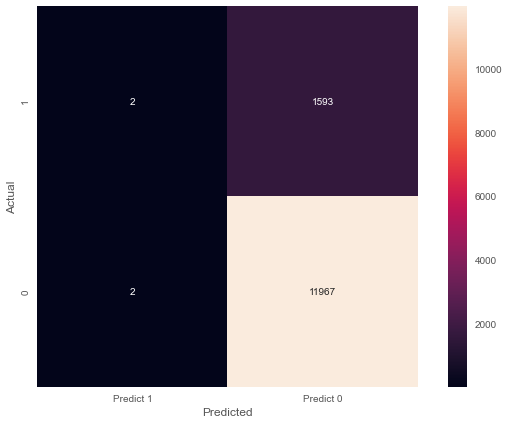

In [1790]:
# Build the Confusion Matrix:

cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
cm
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

df_cm
plt.figure(figsize = (11,7))
sns.heatmap(df_cm, annot=True, fmt="d", square=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [1792]:
# Use Penalty "l1" to improve the model:

# Build Logistic Regression Model:

# Fit the model on Train
model1 = LogisticRegression(solver="liblinear", penalty='l1', random_state=3)
model1.fit(X_train, y_train)

# Predict on test
y_predict = model1.predict(X_test)


coef_df = pd.DataFrame(model1.coef_)
coef_df['intercept'] = model1.intercept_
print(coef_df)

# Get the Accuracy (Score) of the Model against Training Data
accScore = model1.score(X_test, y_test)
print("Model1 Score = %f" %(accScore))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=3, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

     0     1    2    3     4     5     6     7     8    9    10    11   12  \
0 0.02 -0.09 0.01 0.25 -0.21 -0.25 -0.41 -0.40 -0.14 0.46 -0.34 -0.20 0.45   

     13    14    15    16   17   18   19   20    21    22    23    24    25  \
0 -0.15 -0.05 -0.12 -0.18 0.14 0.05 0.29 0.19 -0.17 -0.59 -0.55 -0.27 -1.25   

   intercept  
0      -1.00  
Model1 Score = 0.882409


In [1794]:
# Get Other Metrics:

df_pred = pd.DataFrame(y_predict)
print("Recall:",recall_score(y_test,df_pred))
print("Precision:",precision_score(y_test,df_pred))
print("F1 Score:",f1_score(y_test,df_pred))
print("Roc Auc Score:",roc_auc_score(y_test,df_pred))

Recall: 0.0012539184952978057
Precision: 0.5
F1 Score: 0.0025015634771732337
Roc Auc Score: 0.5005434100789632


In [1795]:
# Generate AUC ROC curves

lg_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
lg_roc_auc


0.5005434100789632

<Figure size 720x576 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

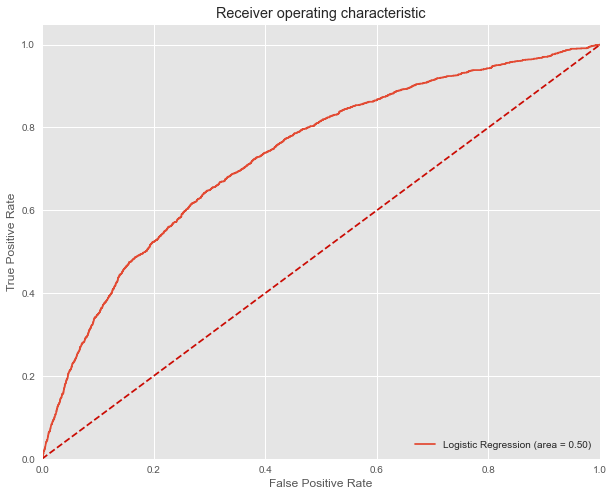

In [1796]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1797]:
# Model Improvement: Hyper Parameter Tuning:
# Get Params of logistic regression
model1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': 3,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [1798]:
# Loop thru various "solver" to check diff values
# solver can only be used with l2, But 'liblinear' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42, penalty='l2', C = 0.75, solver=i)  
    model_fit =  model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print(train_score)
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
[0.883, 0.883, 0.883, 0.883, 0.883]
[0.882, 0.882, 0.882, 0.882, 0.882]


In [1799]:
model = LogisticRegression(random_state=42, penalty='l1', solver='saga')  # changing penalty to l1
model.fit(X_train, y_train)
y_predict = model.predict(X_test)     
print("Trainig accuracy",model.score(X_train,y_train))  
print("Testing accuracy",model.score(X_test, y_test))  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Trainig accuracy 0.8832116788321168
Testing accuracy 0.8824093187850192


In [1800]:
model = LogisticRegression(random_state=42, penalty='l1', solver='liblinear')  # changing penalty to l1
model.fit(X_train, y_train)
y_predict = model.predict(X_test)     
print("Trainig accuracy",model.score(X_train,y_train))  
print("Testing accuracy",model.score(X_test, y_test))  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Trainig accuracy 0.8832116788321168
Testing accuracy 0.8824093187850192


###### No Gain or Change in Accuracy

In [1801]:
model = LogisticRegression(random_state=42, solver='liblinear', penalty='l1',class_weight='balanced') # changing class weight to balanced
model.fit(X_train, y_train) 
y_predict = model.predict(X_test)     
print("Trainig accuracy",model.score(X_train,y_train))  
print("Testing accuracy",model.score(X_test, y_test))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Trainig accuracy 0.6321926248933548
Testing accuracy 0.6346947803007962


In [1802]:
# Loop to check diff Threshold values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42, solver='liblinear', penalty='l1', class_weight='balanced', C=i)  # changing values of C
    model_fit=model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print(train_score)
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]
[0.626, 0.632, 0.632, 0.632, 0.632, 0.632]
[0.628, 0.633, 0.634, 0.635, 0.635, 0.635]


###### Best testing accuracy is when for C = 0.50

LogisticRegression(C=0.25, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

<Figure size 792x504 with 0 Axes>

Text(189.52000000000007, 0.5, 'Actual')

Text(0.5, 43.0, 'Predicted')

Here is The FINAL / BEST Model:

Trainig accuracy 0.6317502448889311

Testing accuracy 0.6341049837805957

Recall: 0.7166144200626959

Precision: 0.20215776441457375

F1 Score: 0.3153538419092289

Roc Auc Score: 0.6698620600605902

Confusion Matrix:


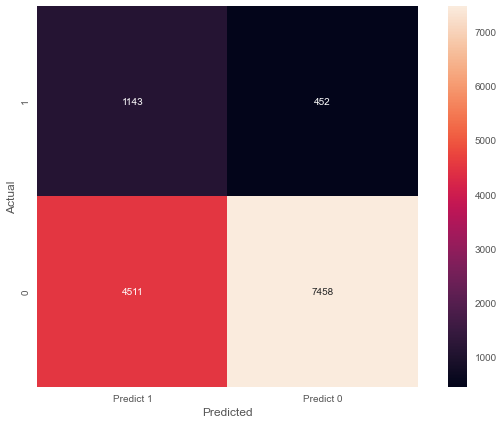

In [1803]:
# Hence the Final / Best model is: 
model = LogisticRegression(random_state=42, solver='liblinear', penalty='l1', class_weight='balanced',C=0.25) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
# cm
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

# df_cm
plt.figure(figsize = (11,7))
sns.heatmap(df_cm, annot=True, fmt="d", square=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

print('Here is The FINAL / BEST Model:')
print()
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))
print()
print('Confusion Matrix:')

In [1804]:
# Build Decesion Tree:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [1805]:
# Score the DTree:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))


0.9546876481183051
0.835594219994102


In [1807]:
# Visualize DTree:

train_char_label = ['No', 'Yes']
TD_Tree_File = open('TD_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=TD_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
TD_Tree_File.close()

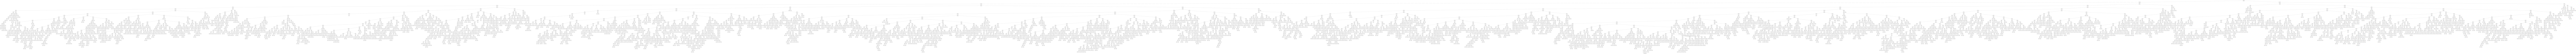

In [1810]:
# Display DTree:  

retCode = system("dot -Tpng TD_tree.dot -o TD_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("TD_tree.png"))


In [1811]:
# Reducing over fitting by Regularization: 
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

0.8838752488387525
0.882261869654969


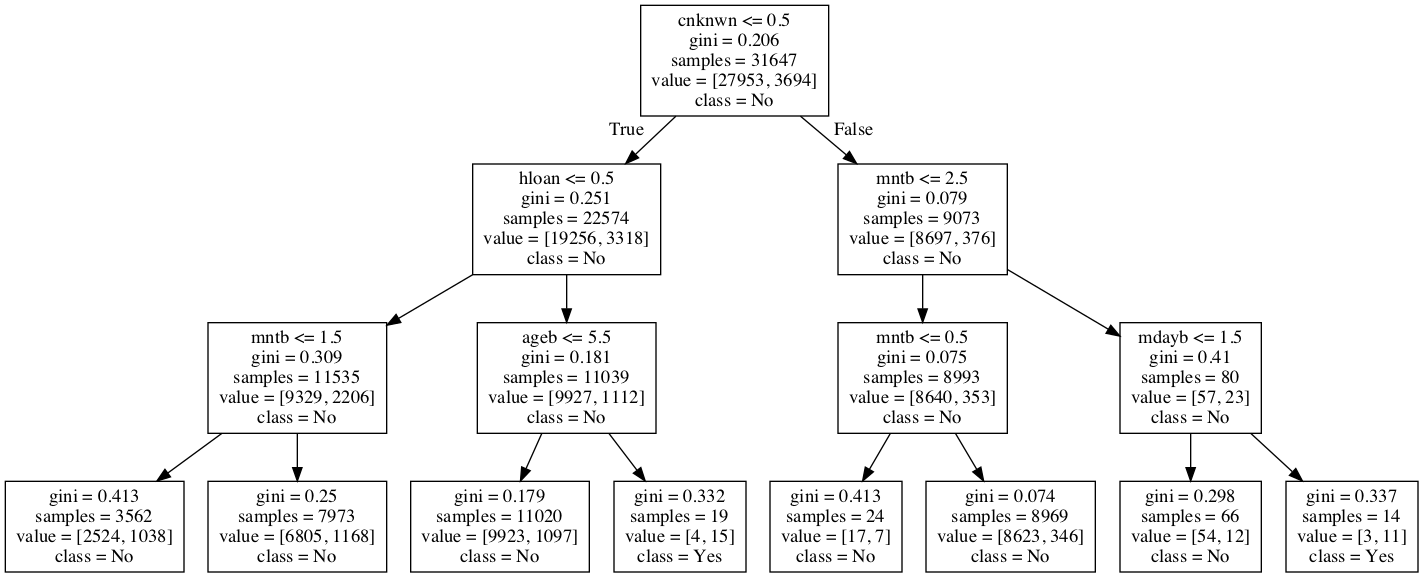

In [1812]:
# Display DTree:

train_char_label = ['No', 'Yes']
TD_Tree_FileR = open('TD_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=TD_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
TD_Tree_FileR.close()

retCode = system("dot -Tpng TD_treeR.dot -o TD_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("TD_treeR.png"))


In [1813]:
# importance of features in the tree building ( The importance of a feature is computed as the (normalized) total 
# reduction of the criterion brought by that feature = Known as the Gini importance: 

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

        Imp
ageb   0.05
mntb   0.31
mdayb  0.02
balb   0.00
tnmb   0.00
jblue  0.00
jentr  0.00
jmaid  0.00
jmgmt  0.00
jrtrd  0.00
jself  0.00
jsvcs  0.00
jstdnt 0.00
jtchn  0.00
jnemp  0.00
jnknwn 0.00
mmrd   0.00
msngl  0.00
esec   0.00
etrt   0.00
enknwn 0.00
dflt   0.00
hloan  0.24
ploan  0.00
cphone 0.00
cnknwn 0.38


0.882261869654969


<Figure size 504x360 with 0 Axes>

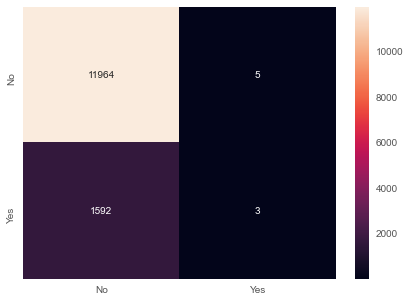

In [1849]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)
y_predict_dt = y_predict

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


##### Deliverable 3.2 : Build the Ensemble Models = 15 Marks  
* Create Ensemble Models for ***Bagging & Boosting*** **at least 3 algorithms**
* Note the Model Performance by using different Matrices.  
* Use same Metrics as in above Model. (at least 3 algorithms) 

In [1815]:
# Build Bagging Learning Model:

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)


0.8569006192863462


<Figure size 504x360 with 0 Axes>

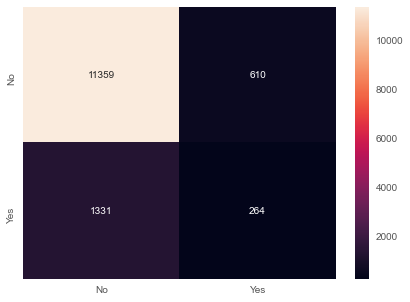

In [1850]:
y_predict = bgcl.predict(X_test)
y_predict_bg = y_predict

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [1817]:
# Build AdaBooster Learning Model:

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)


0.8821881450899439


<Figure size 504x360 with 0 Axes>

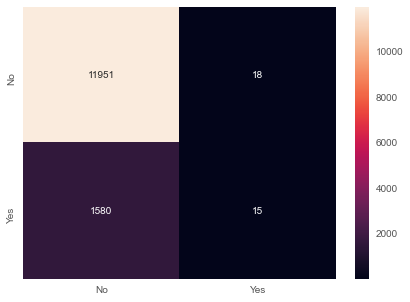

In [1851]:
y_predict = abcl.predict(X_test)
y_predict_ab = y_predict

print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [1820]:
# Gradient Boost Learning Model:

gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


0.8820406959598939


<Figure size 504x360 with 0 Axes>

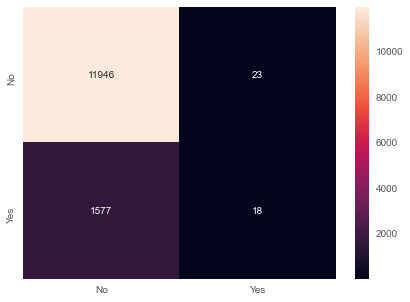

In [1852]:
y_predict = gbcl.predict(X_test)
y_predict_gb = y_predict

print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

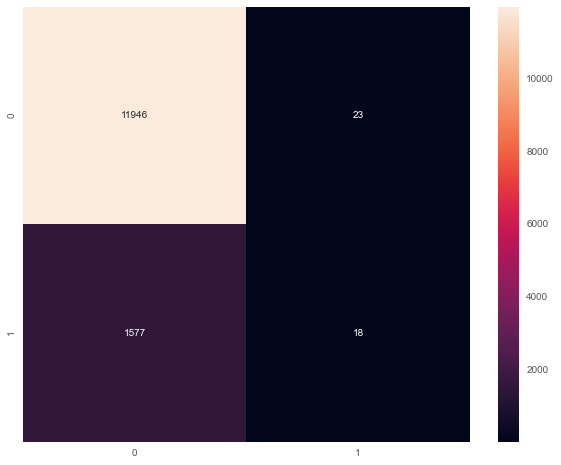

In [1822]:
sns.heatmap(cm, annot=True ,fmt='g')

In [1823]:
# Random Forest Classifier Learning Model:

rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)


0.8613978177528753


<Figure size 504x360 with 0 Axes>

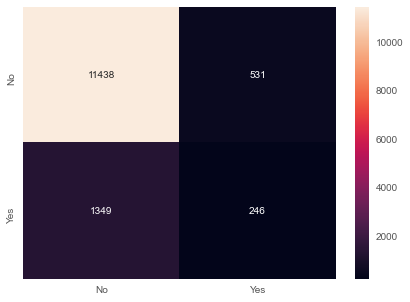

In [1853]:
y_predict = rfcl.predict(X_test)
y_predict_rf = y_predict

print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

###### My Admin Stuff: MSB Notebook Backups: Backup 10 Fri.Jun.20 12:08am ^. 

##### Deliverable 3.3 : Conclusion = 5 Marks
* Make a DataFrame to compare models and their metrics.
* Give conclusion regarding the best algorithm and your reason behind it.

In [1854]:
y_predict_dt[:20]
y_predict_bg[:20]
y_predict_ab[:20]
y_predict_bg[:20]
y_predict_rf[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [1843]:
# Combine all the results into a single dataframe ( this is just to aid visualizing the results )

pred_DT = y_predict_dt.reshape(13564,1)
pred_RF = y_predict_dt.reshape(13564,1)
pred_AB = y_predict_dt.reshape(13564,1)
pred_BG = y_predict_dt.reshape(13564,1)
pred_GB = y_predict_dt.reshape(13564,1)

k = np.concatenate((pred_DT,pred_RF,pred_AB,pred_BG,pred_GB),axis= 1)
df_k = pd.DataFrame(k,columns= ['DT','RF','AB','BG','GB'])
df_k.head(10)

DT  RF  AB  BG  GB
0   0   0   0   0   0
1   0   0   0   0   0
2   0   0   0   0   0
3   0   0   0   0   0
4   0   0   0   0   0
5   0   0   0   0   0
6   0   0   0   0   0
7   0   0   0   0   0
8   0   0   0   0   0
9   0   0   0   0   0

In [1855]:
# Accuracy Scores for different algorithms:

accuracy_score(y_test, df_k['DT'])
accuracy_score(y_test, df_k['RF'])
accuracy_score(y_test, df_k['AB'])
accuracy_score(y_test, df_k['BG'])
accuracy_score(y_test, df_k['GB'])

0.882261869654969

0.882261869654969

0.882261869654969

0.882261869654969

0.882261869654969

In [1856]:
# Take either the mean or median OR your custom weights:
df_k['mean'] =df_k.iloc[:,0:5].mean(axis=1)
df_k['median'] =df_k.iloc[:,0:5].median(axis=1)
df_k['mode'] =df_k.iloc[:,0:5].mode(axis=1).iloc[:,0]

In [1857]:
# Check Final Accuracy Scores for either of these combinations: 
accuracy_score(y_test, df_k['mean'].round(decimals=0))
accuracy_score(y_test, df_k['median'])
accuracy_score(y_test, df_k['mode'])

0.882261869654969

0.882261869654969

0.882261869654969

### Conclusion: All Algorithms Seem to be producing similar / same resluts. So any one of these can be used.

###### My Admin Stuff: MSB Notebook Backups: Backup 11 (Final) Fri.Jun.20 12:51 am ^. 